 Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
 I rodzaju) w teście Kołmogorowa w przypadku weryfikacji zgodności z rozkładem NIG oraz z
 rozkładem gamma o różnych wartościach parametrów. Należy porównać wyniki klasycznego sposobu
 testowania i testowania z wykorzystaniem PIT (probability integral transform). Uzyskane wyniki
 należy przedstawić na odpowiednich wykresach ilustrujących moce testów z uwzględnieniem:
- liczby danych,
- parametrów generowanego rozkładu


In [13]:

import numpy as np
import scipy.stats as stats
from scipy.special import gamma
from numpy.random import default_rng

In [14]:
# Parametry
SampleSizes = [i for i in range(10, 101, 10)]  # rozmiary próbek
simulations_number = 100  # liczba symulacji

# w internecie przeczytalem, że takie prametry mogą przyjąć rozkłady gamma oraz NIG, jednak nie mogłem znaleźć informacji jak bardzo parametr wpływa na rozkład więc wykorzystam "małe" wartości parametrów

# Parametry dla rozkładu Gamma
shape_params = [1, 2, 3, 4, 5]  # parametry kształtu
scale_params = [1, 2]  # parametry skali

# Parametry dla rozkładu NIG
mu_params = [0, 0.5, 1]  # parametry mu
alpha_params = [1, 2, 3]  # parametry alpha
beta_params = [0, 1, 2]  # parametry beta
delta_params = [1, 2, 3]  # parametry delta

# Inicjalizacja wyników
results = []
rng = default_rng()

inicjuję parametry i potrzebne zmienne

In [15]:

# Inicjalizacja wyników

for Sample in SampleSizes:
    for shape in shape_params:
        for scale in scale_params:
            # Inicjalizacja licznika
            ks_counter = 0
            pit_ks_counter = 0

            for _ in range(simulations_number):
                # Generowanie danych z rozkładu Gamma
                data = np.random.gamma(shape, scale, Sample)
                data2 = np.random.gamma(shape, scale, Sample)

                # Test Kołmogorowa-Smirnowa
                ks_stat, p_val_ks = stats.kstest(data, 'gamma', args=(shape, scale))
                if p_val_ks < 0.05:
                    ks_counter += 1

                # Transformacja PIT
                pit_data = stats.gamma.cdf(data2, shape, scale)

                # Test Kołmogorowa-Smirnowa na danych po transformacji PIT
                pit_ks_stat, p_val_pit_ks = stats.kstest(pit_data, 'uniform')
                if p_val_pit_ks < 0.05:
                    pit_ks_counter += 1

            # Zapisanie wyników
            results.append(['Gamma', shape, scale, Sample, ks_counter/simulations_number, pit_ks_counter/simulations_number])

    for mu in mu_params:
        for alpha in alpha_params:
            for beta in beta_params:
                for delta in delta_params:
                    # Inicjalizacja licznika
                    ks_counter = 0
                    pit_ks_counter = 0

                    for _ in range(simulations_number):
                        # Generowanie danych z rozkładu NIG
                        data = mu + delta * (beta + np.sqrt(np.random.gamma(alpha, 2, Sample)) * np.random.normal(0, 1, Sample)) / np.sqrt(np.random.gamma(alpha, 2, Sample))
                        data2 = mu + delta * (beta + np.sqrt(np.random.gamma(alpha, 2, Sample)) * np.random.normal(0, 1, Sample)) / np.sqrt(np.random.gamma(alpha, 2, Sample))
                        # Test Kołmogorowa-Smirnowa
                        ks_stat, p_val_ks = stats.kstest(data, 'norm')
                        if p_val_ks < 0.05:
                            ks_counter += 1

                        # Transformacja PIT
                        pit_data = stats.norm.cdf(data2)

                        # Test Kołmogorowa-Smirnowa na danych po transformacji PIT
                        pit_ks_stat, p_val_pit_ks = stats.kstest(pit_data, 'uniform')
                        if p_val_pit_ks < 0.05:
                            pit_ks_counter += 1

                    # Zapisanie wyników
                    results.append(['NIG', mu, alpha, beta, delta, Sample, ks_counter/simulations_number, pit_ks_counter/simulations_number])


Dwie osobne pętle dla dwóch rozkładów ze względu na różne parametry. 

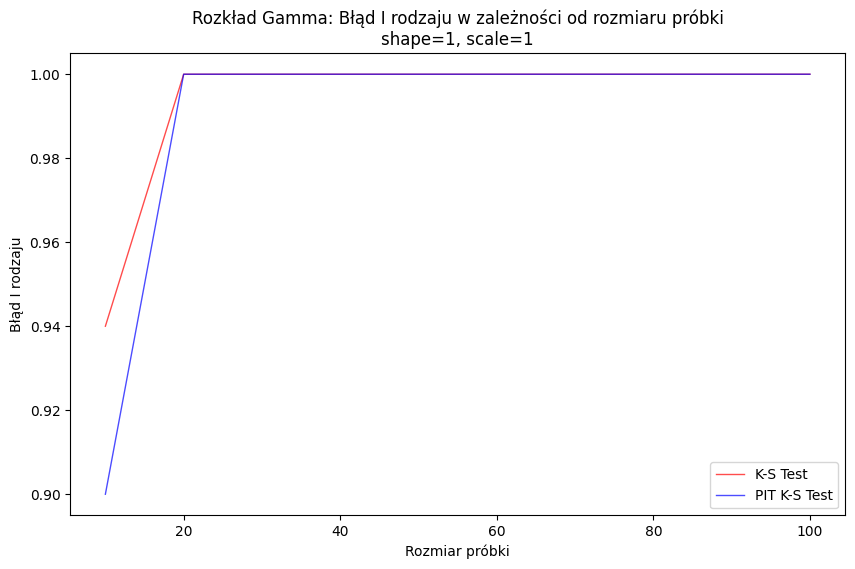

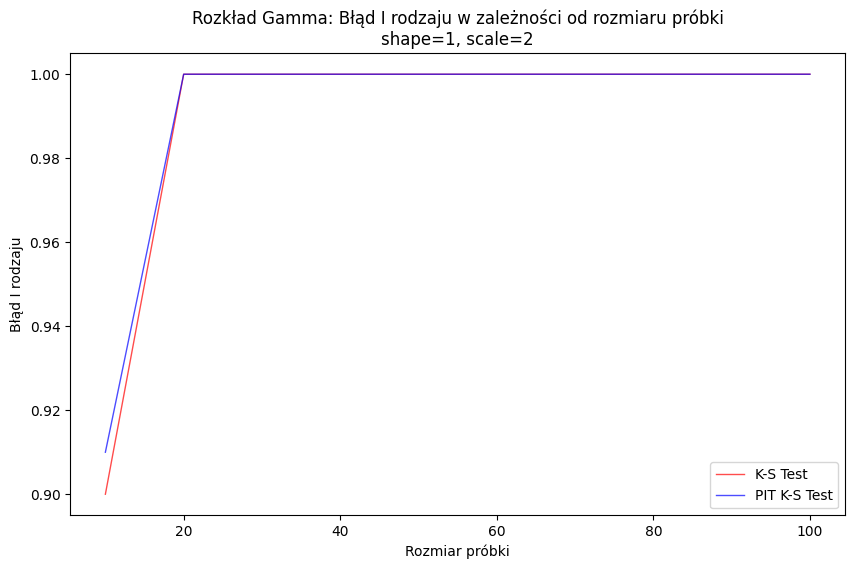

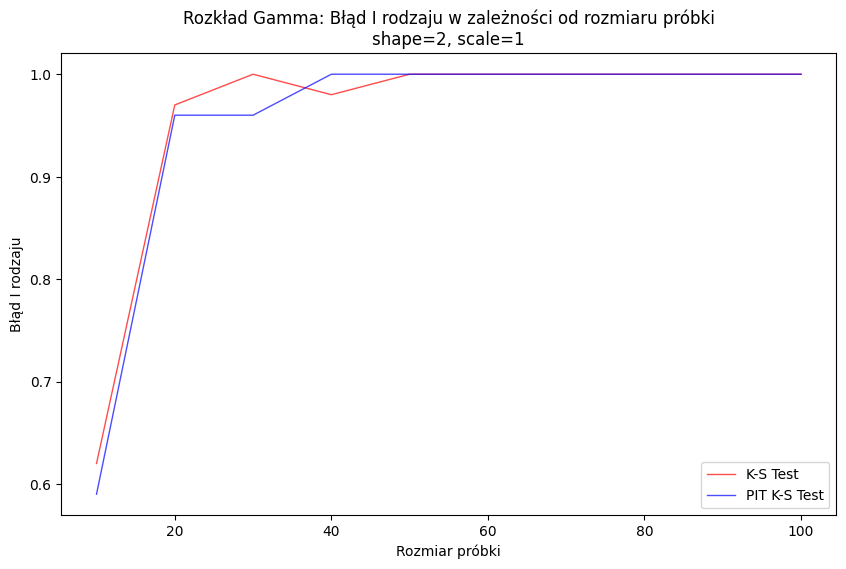

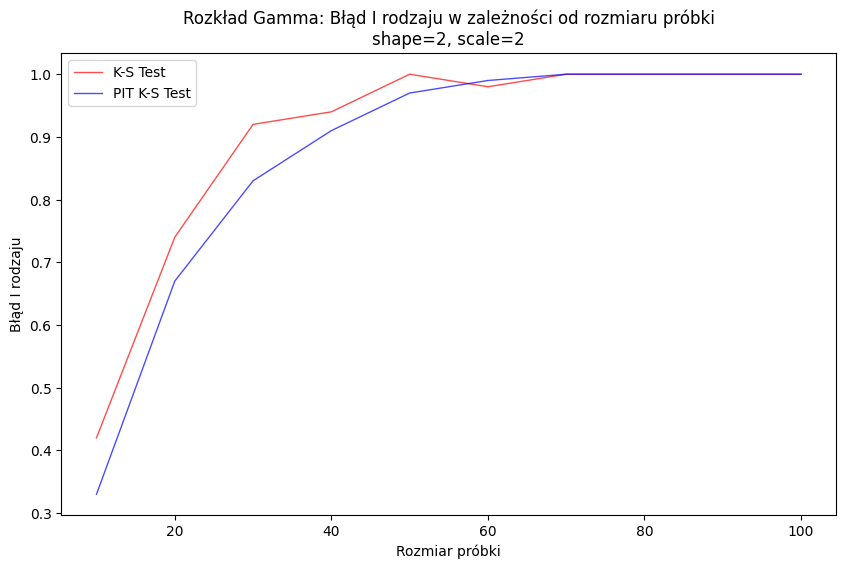

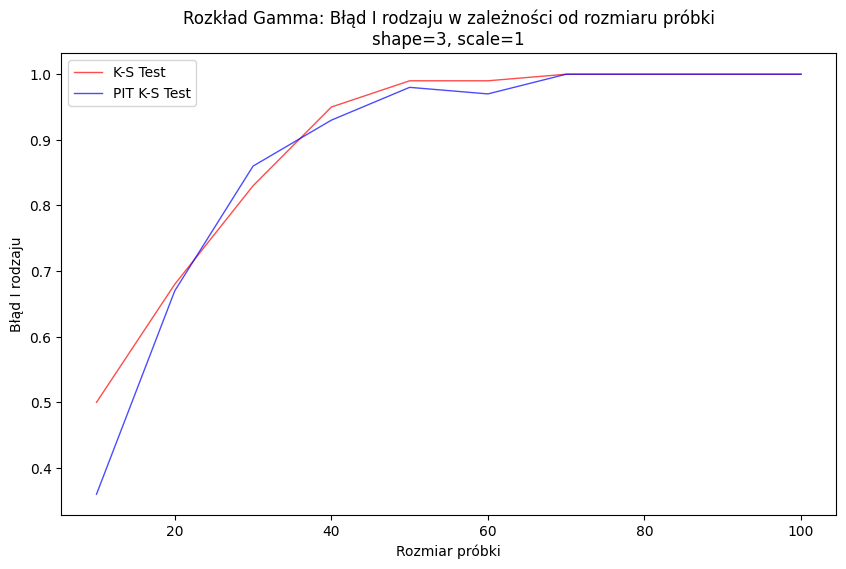

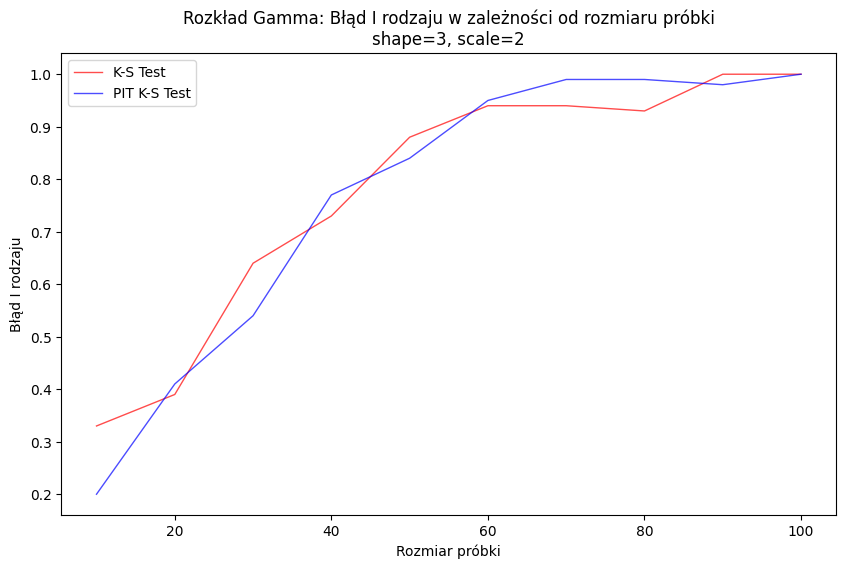

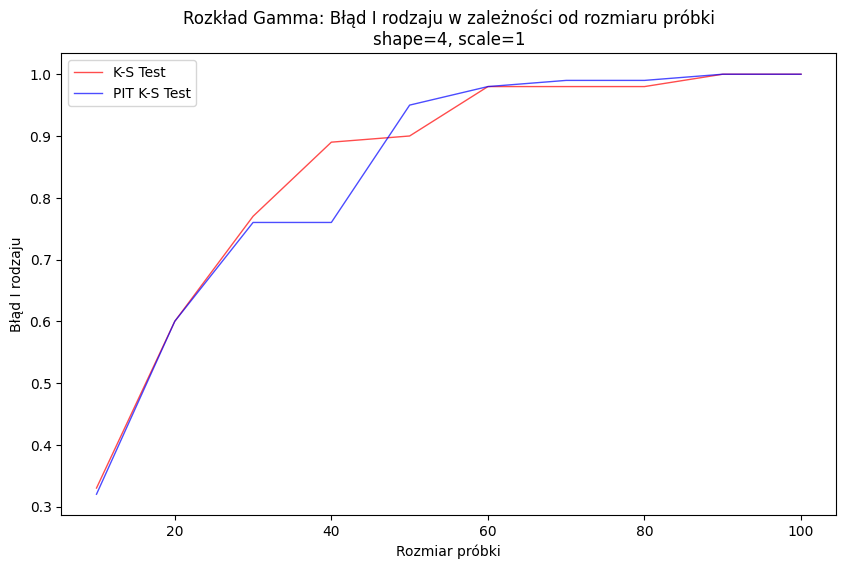

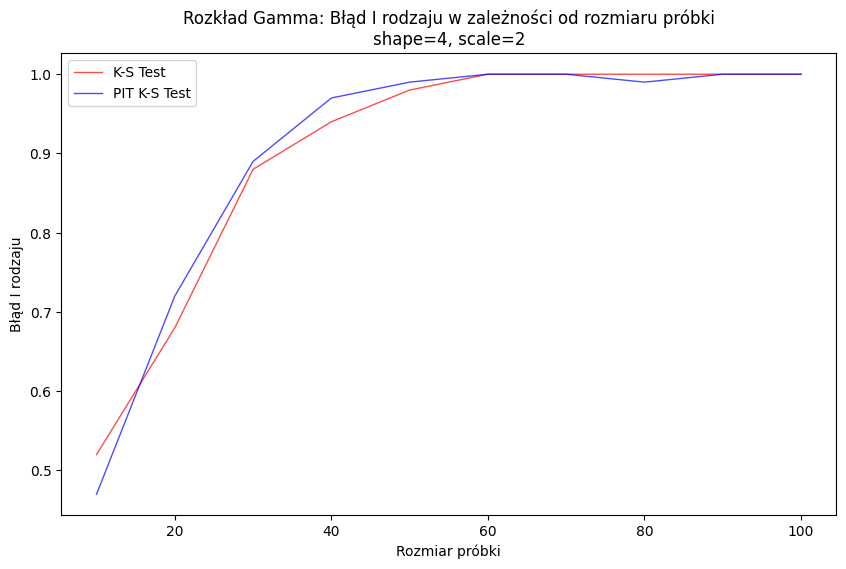

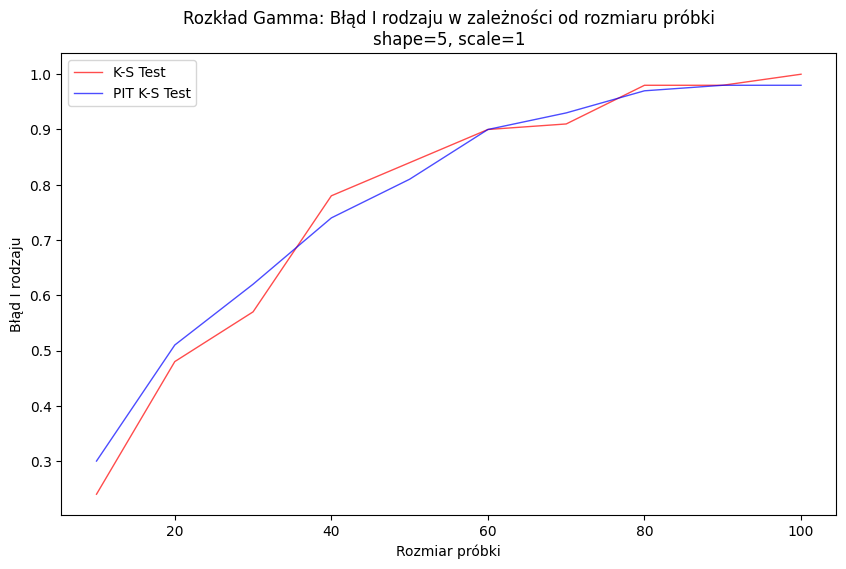

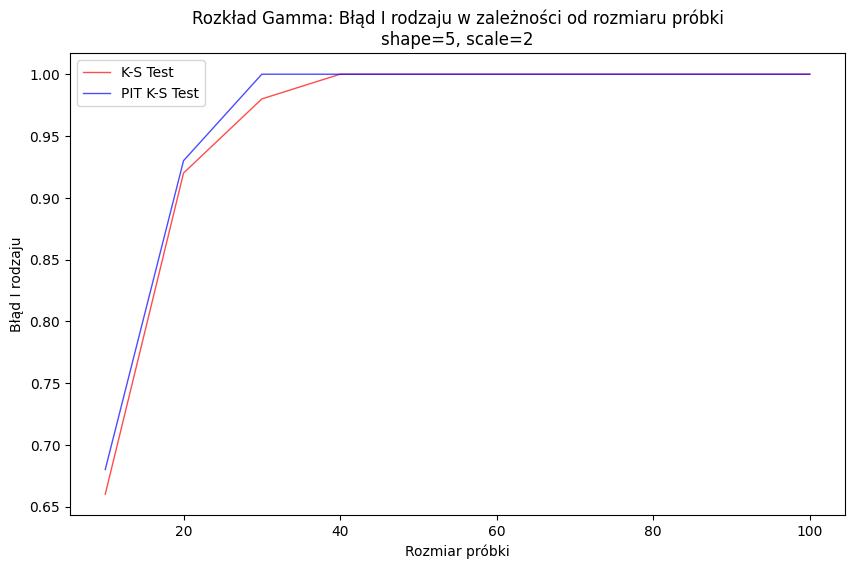

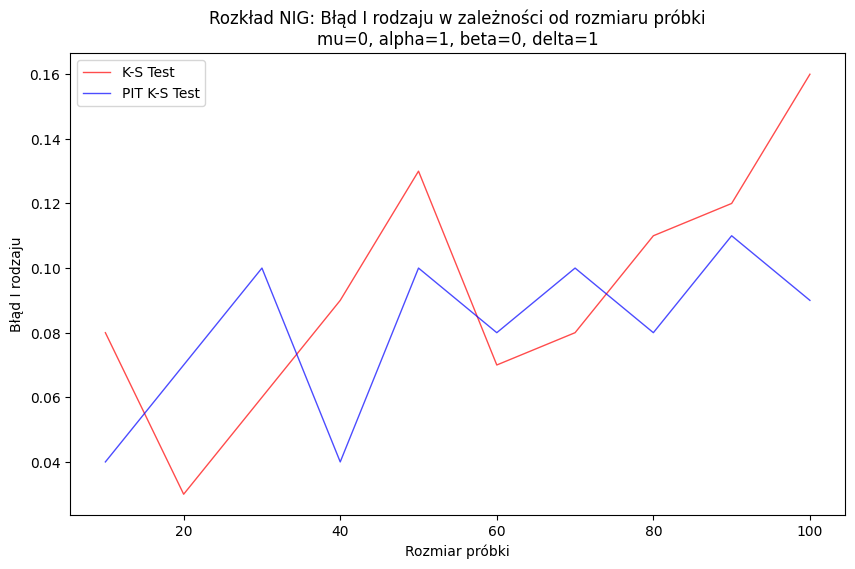

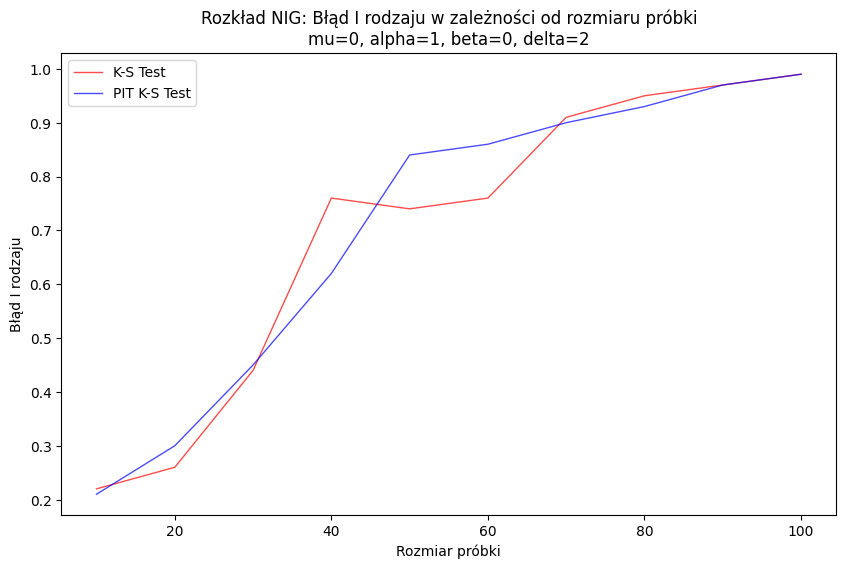

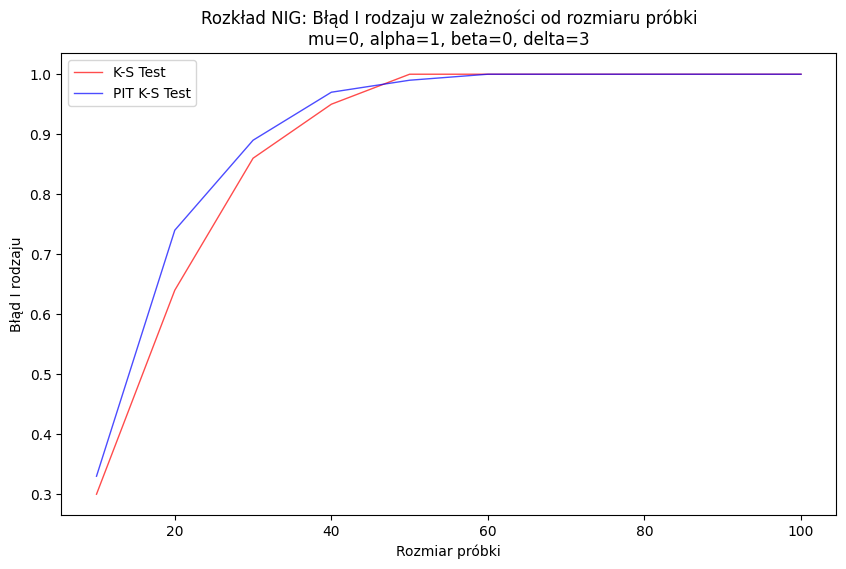

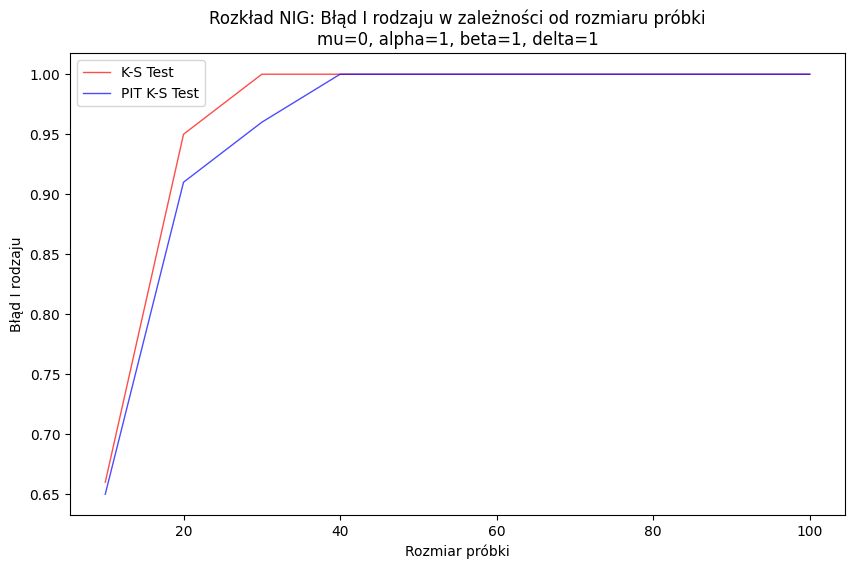

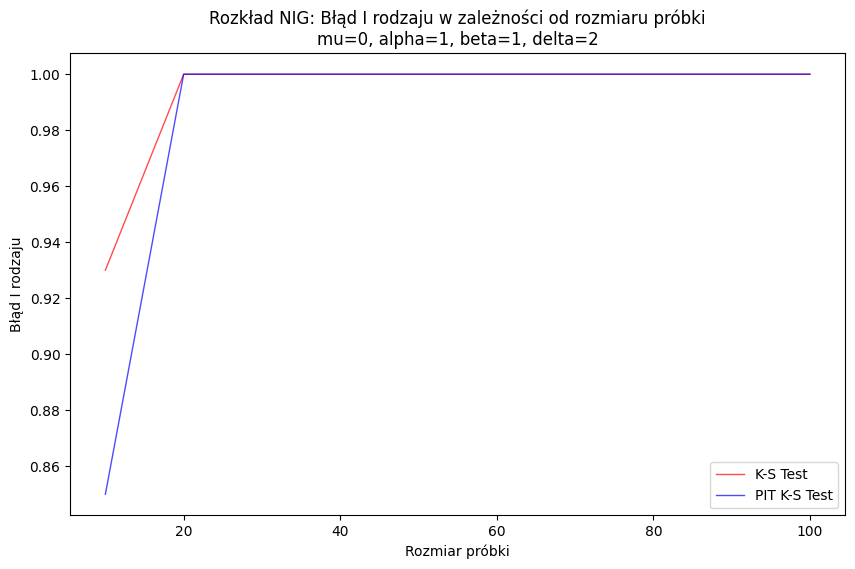

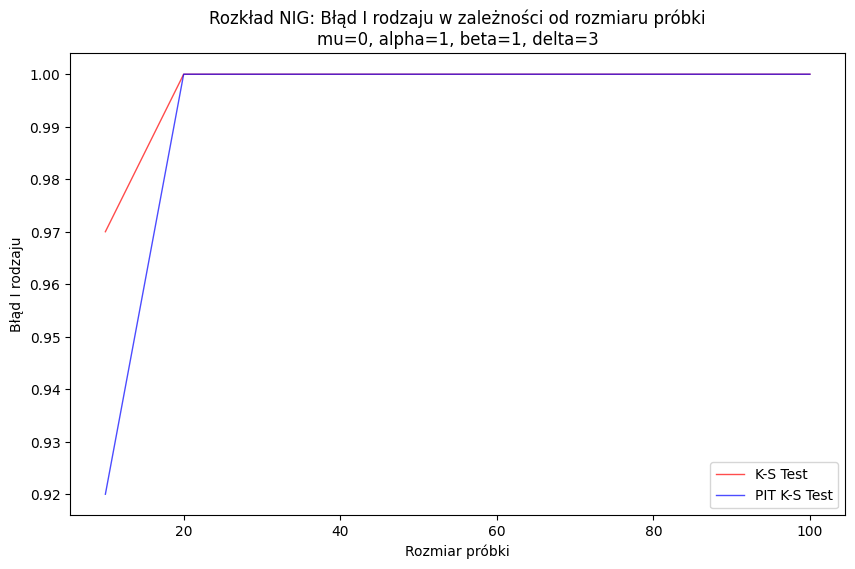

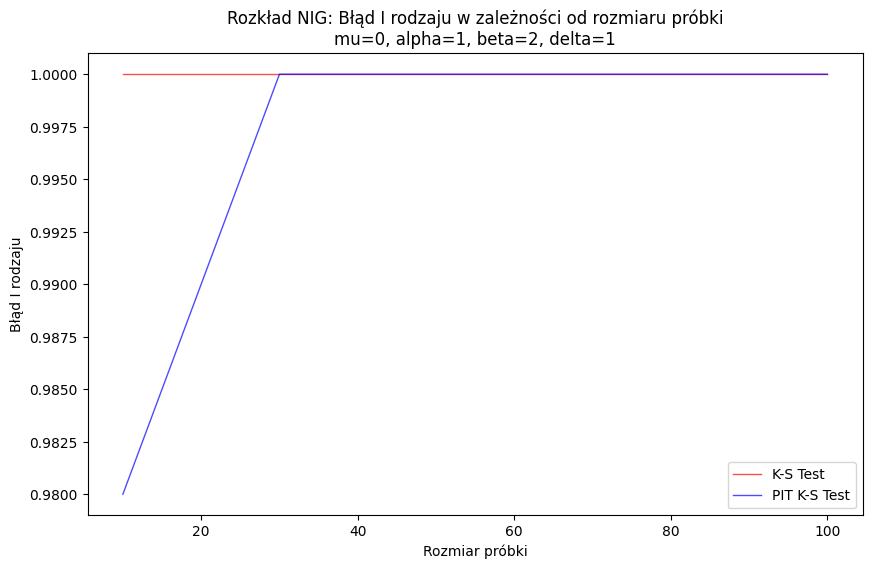

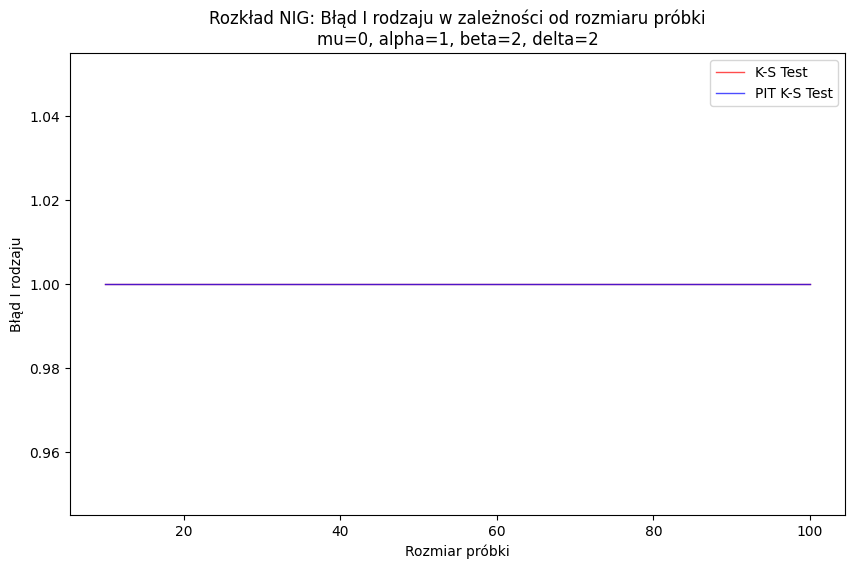

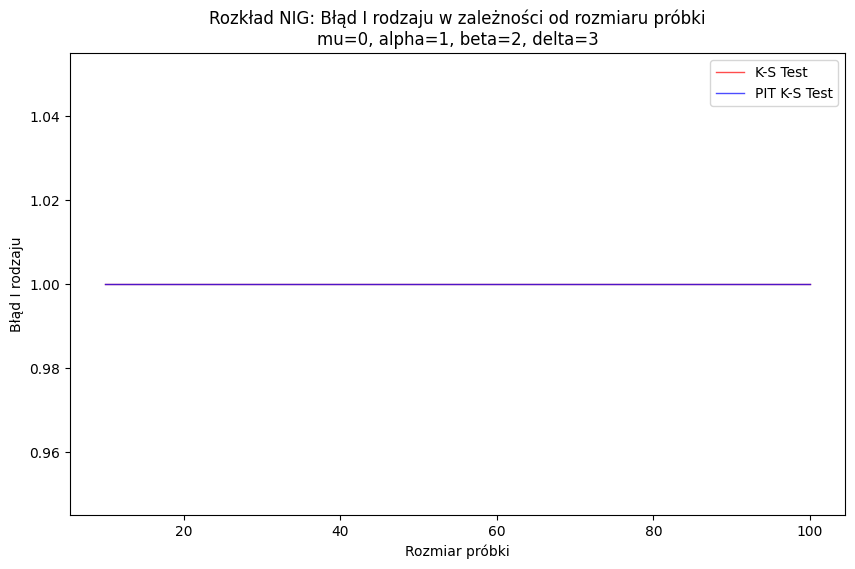

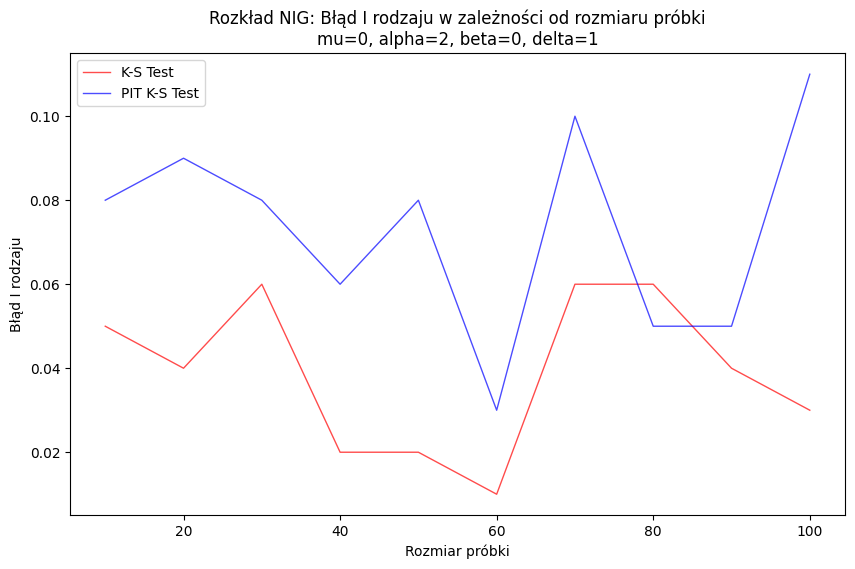

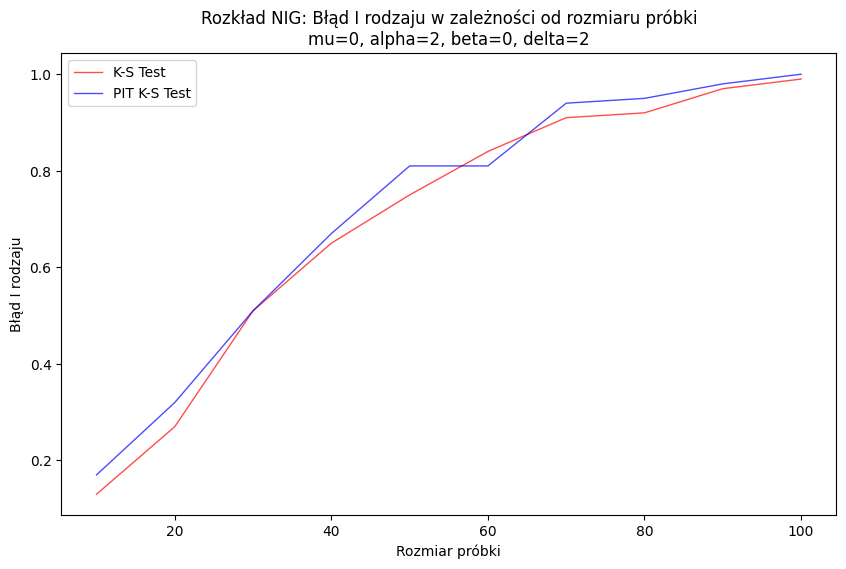

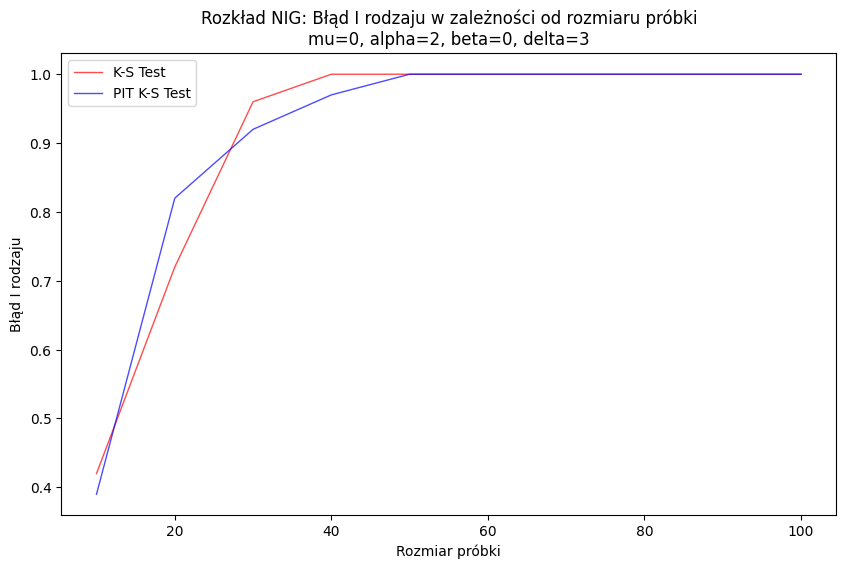

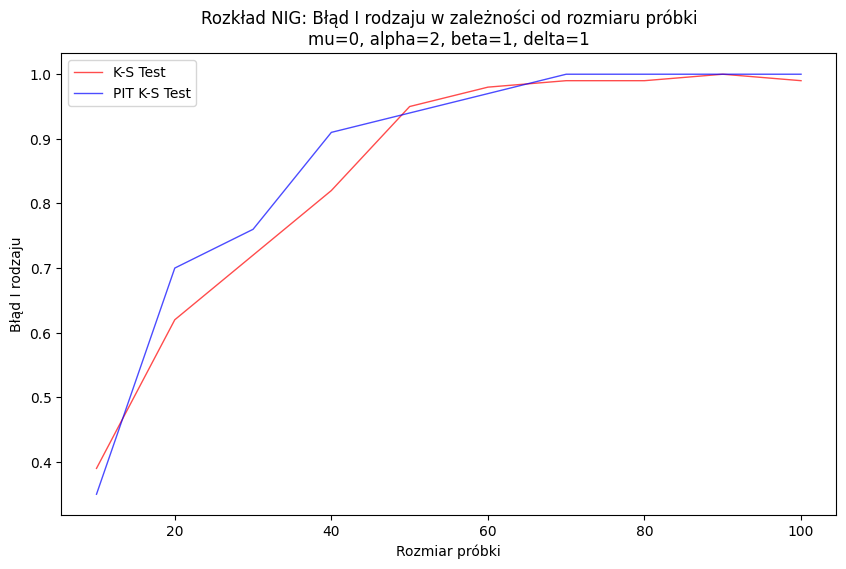

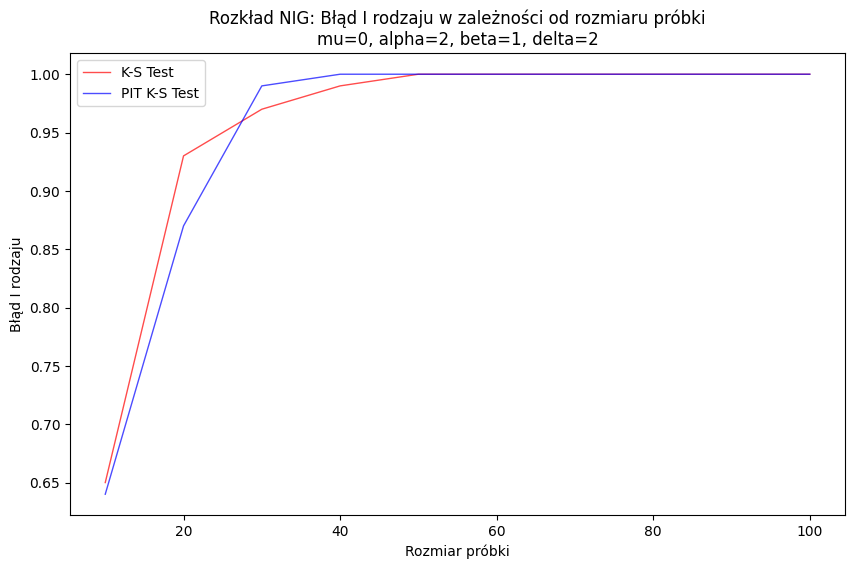

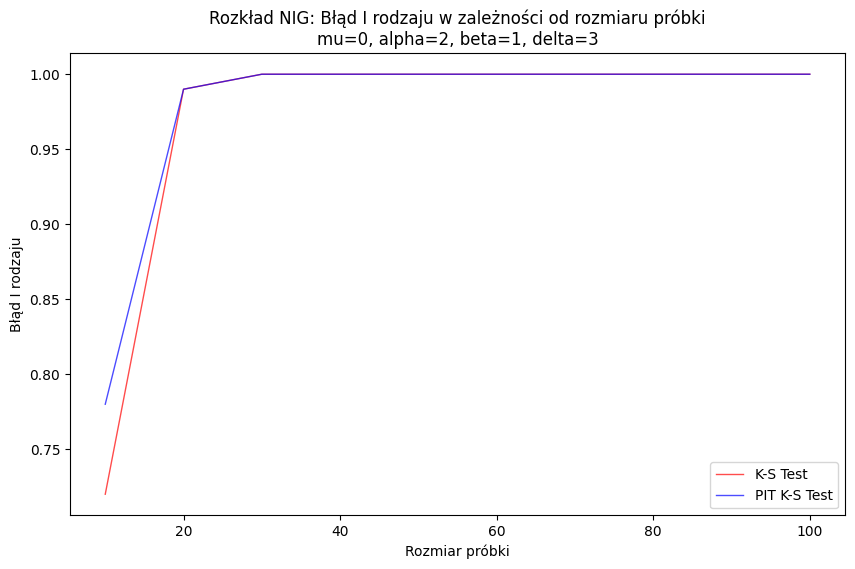

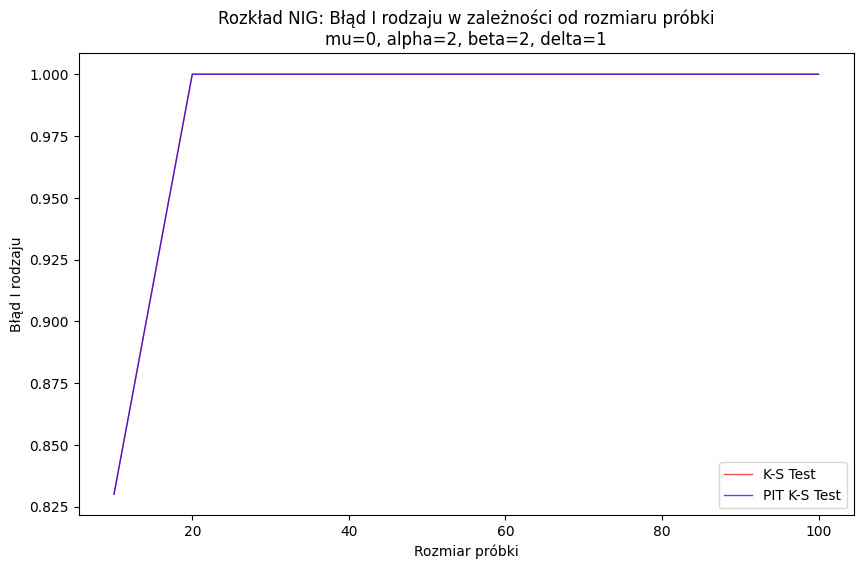

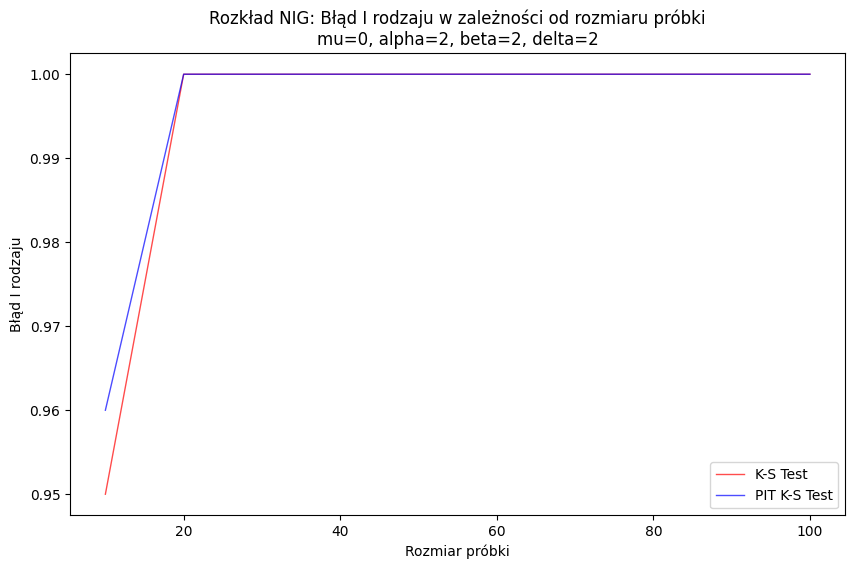

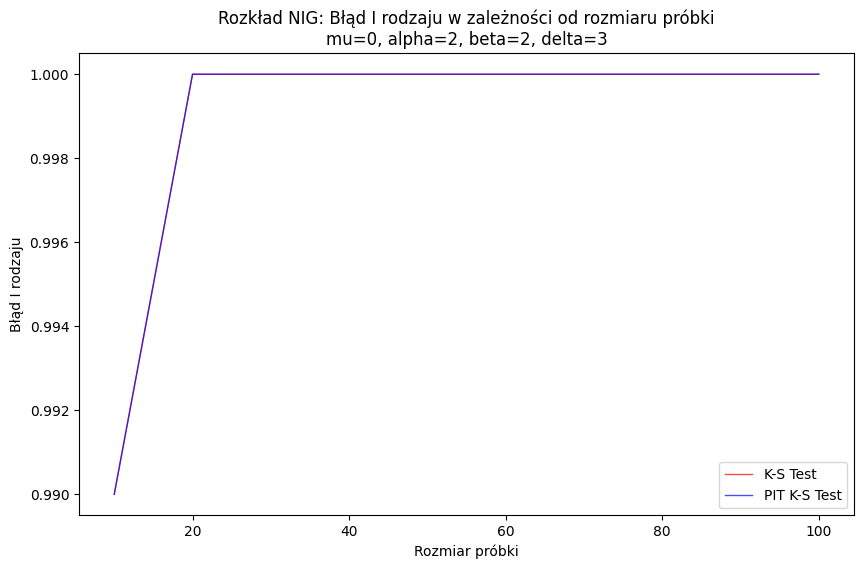

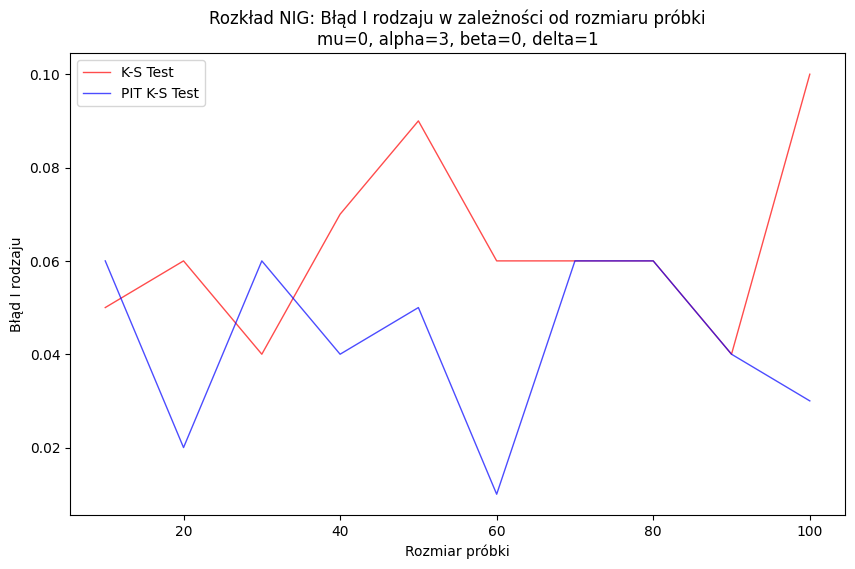

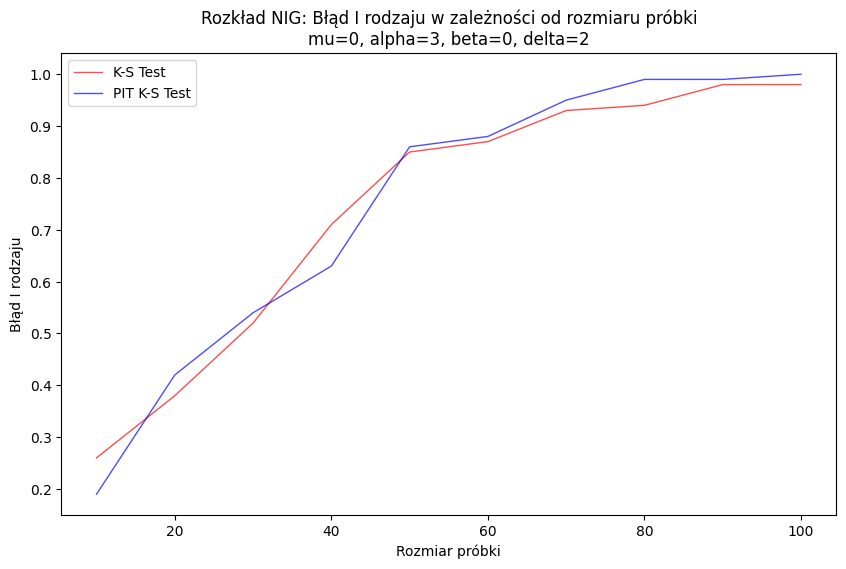

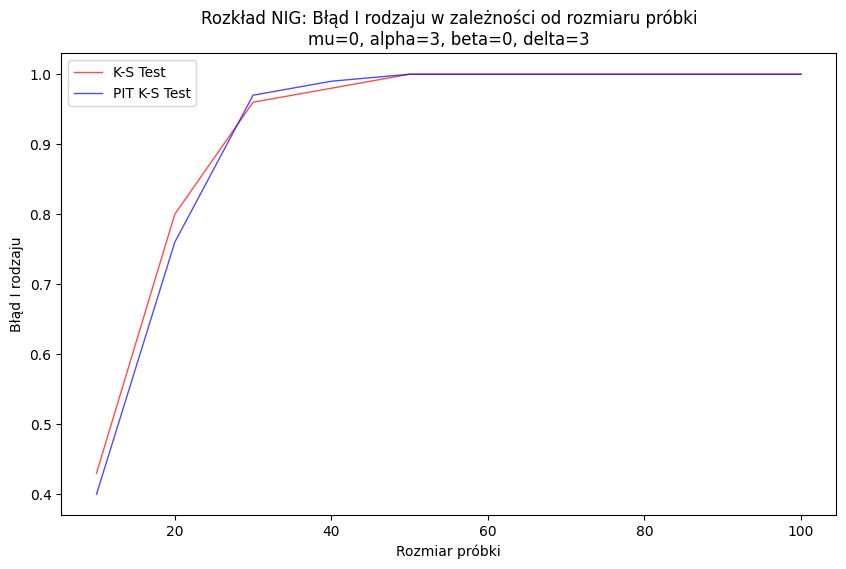

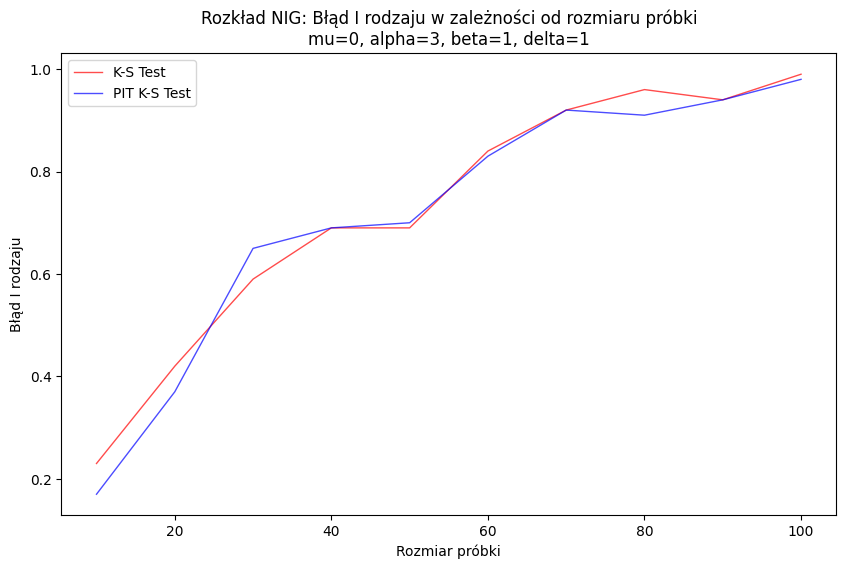

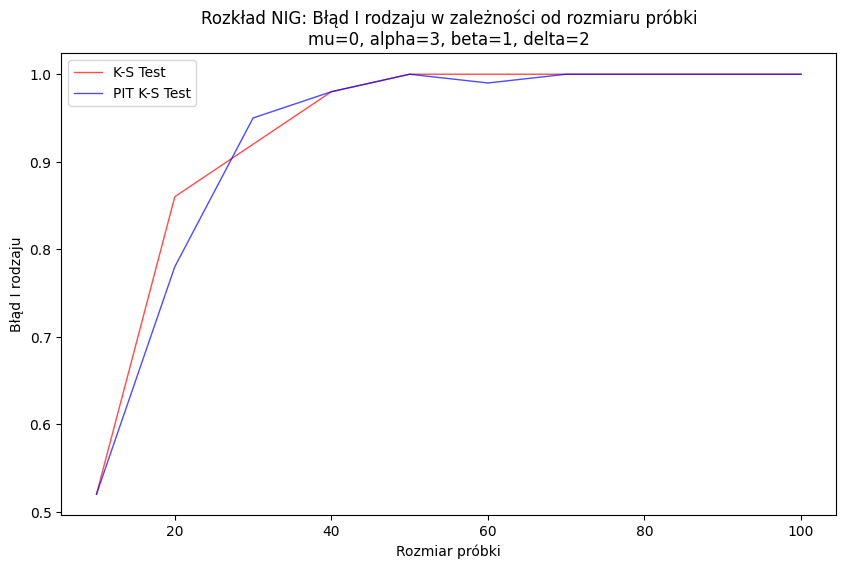

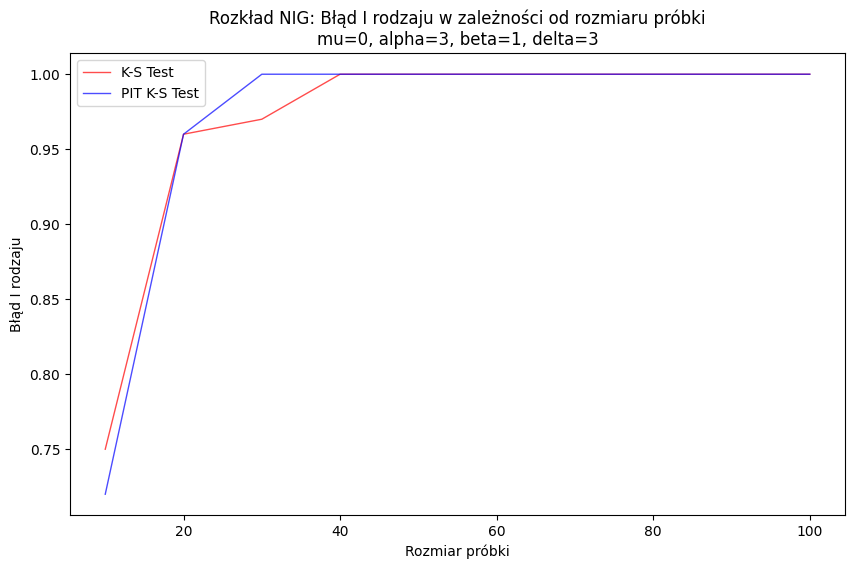

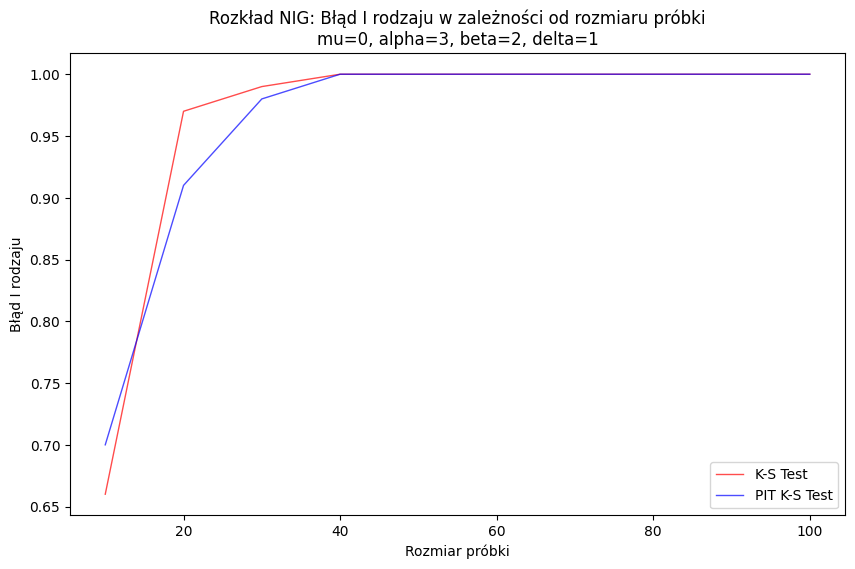

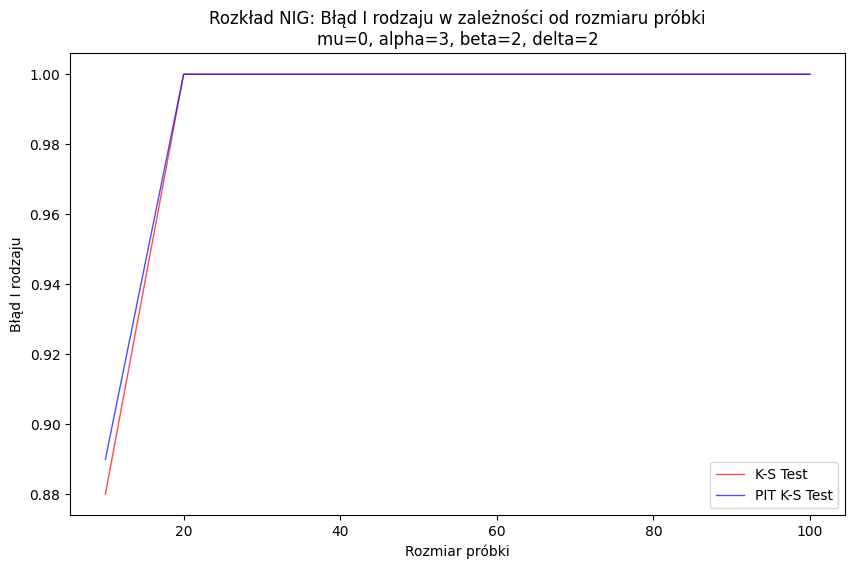

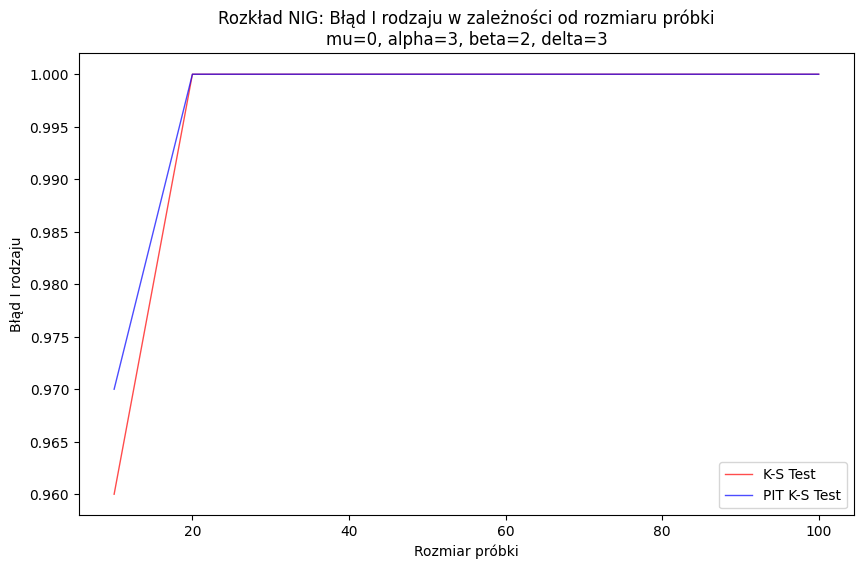

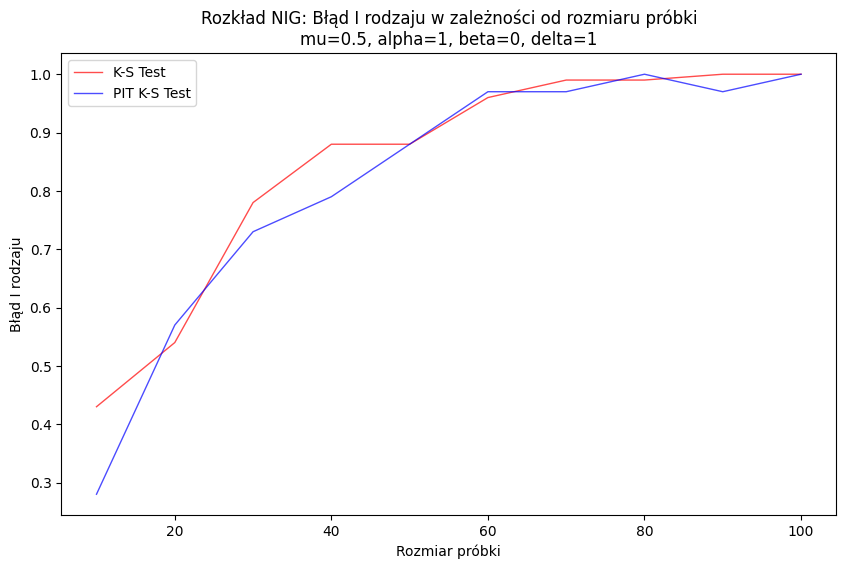

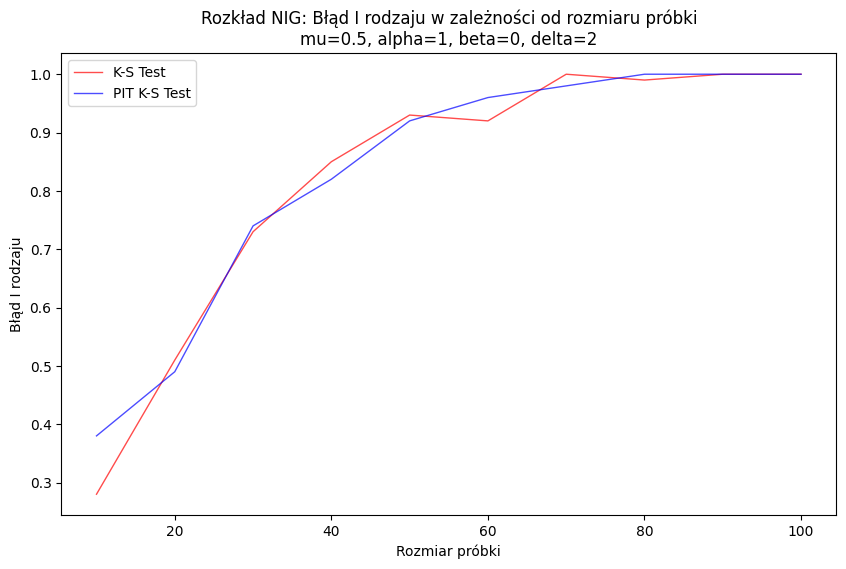

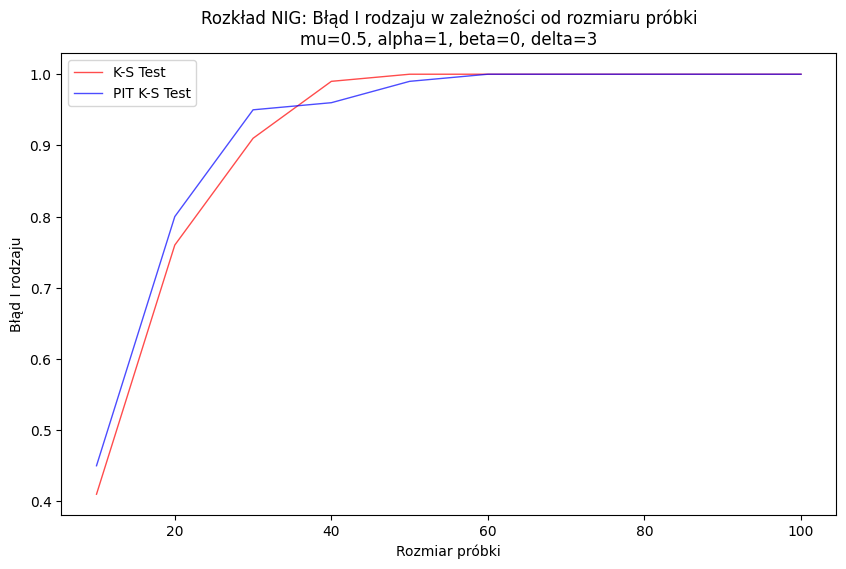

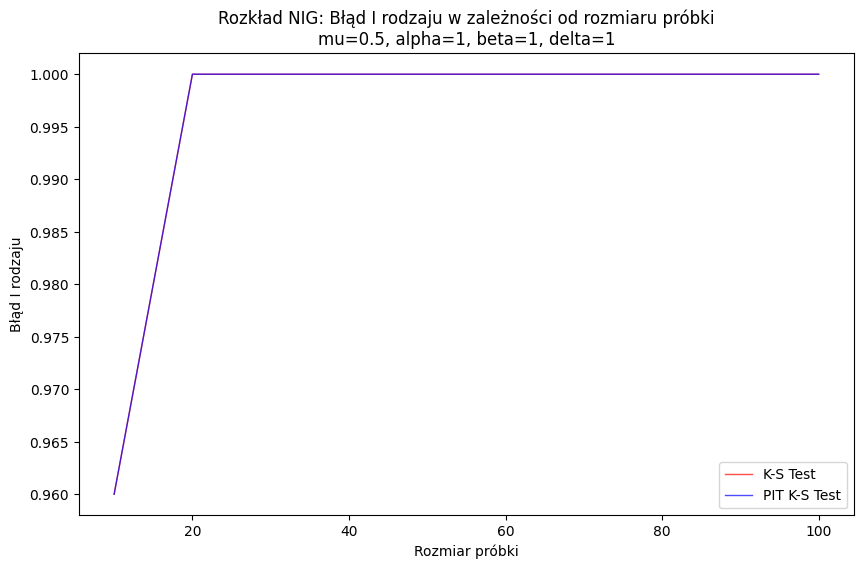

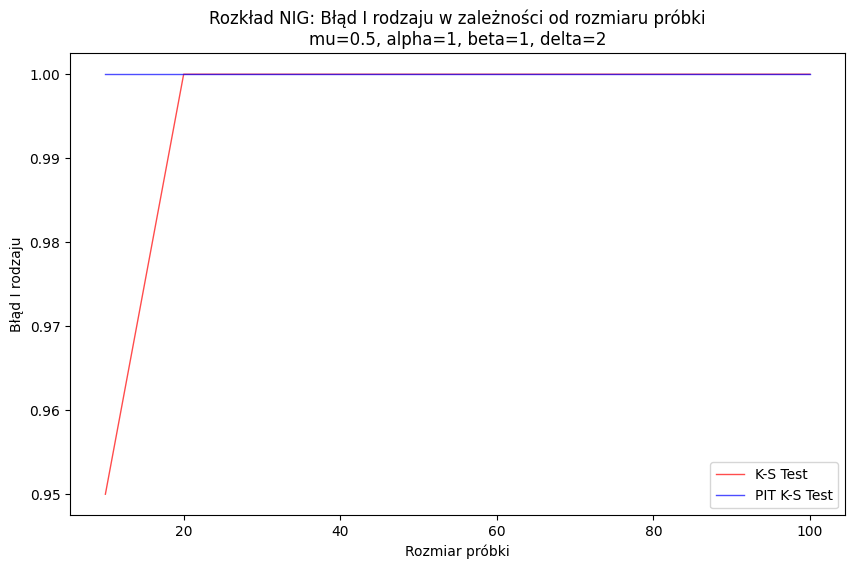

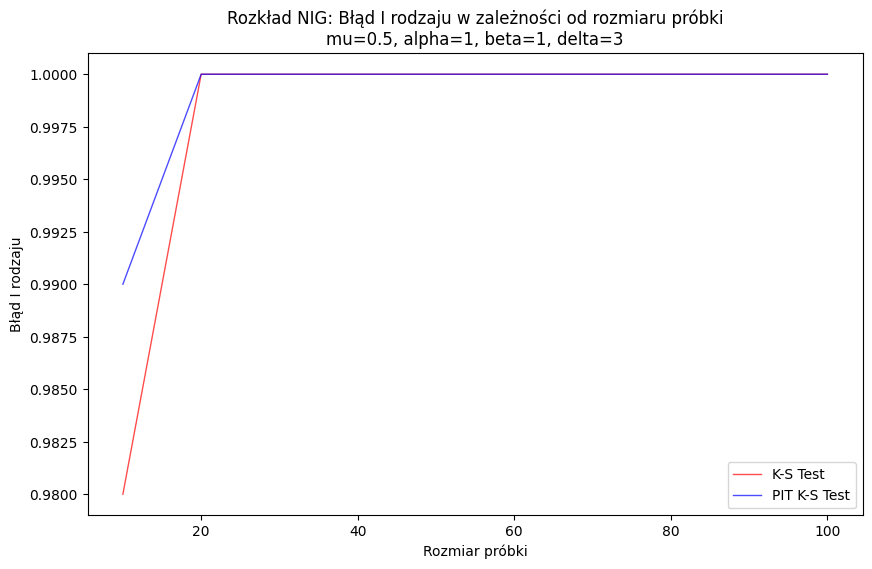

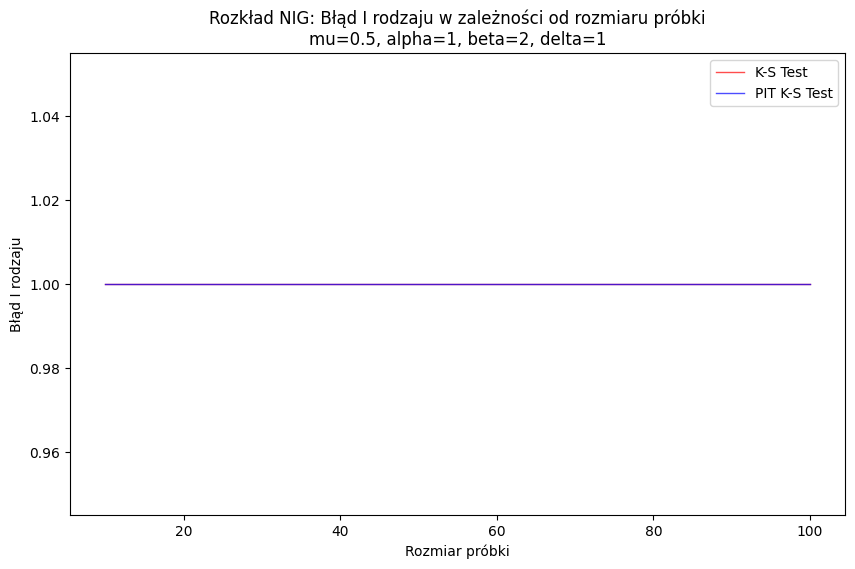

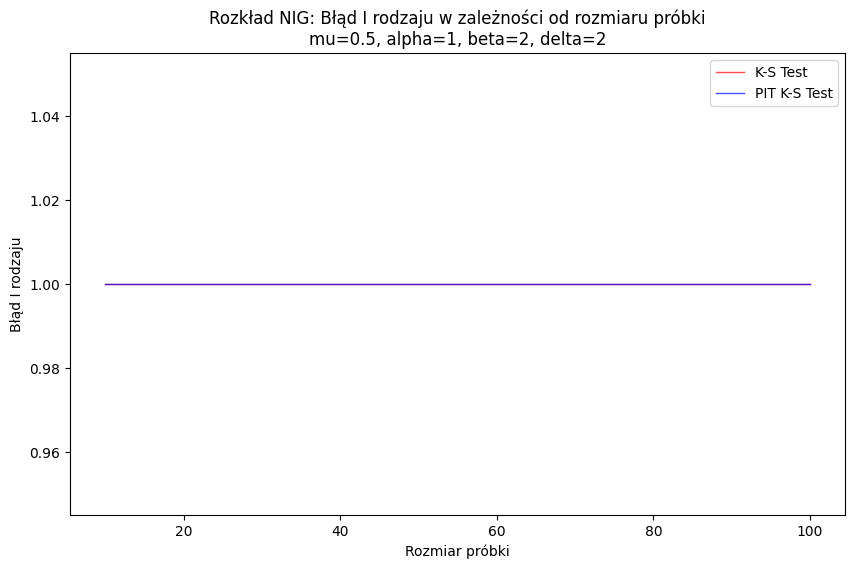

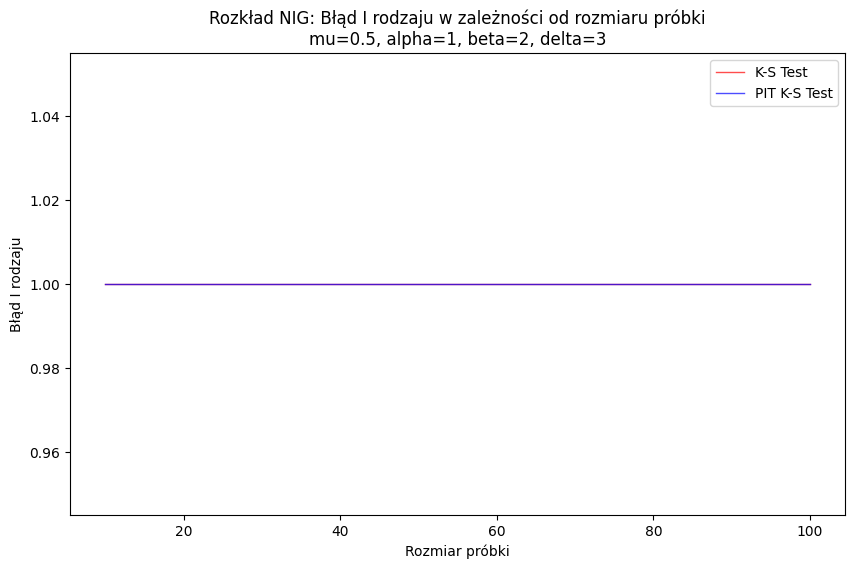

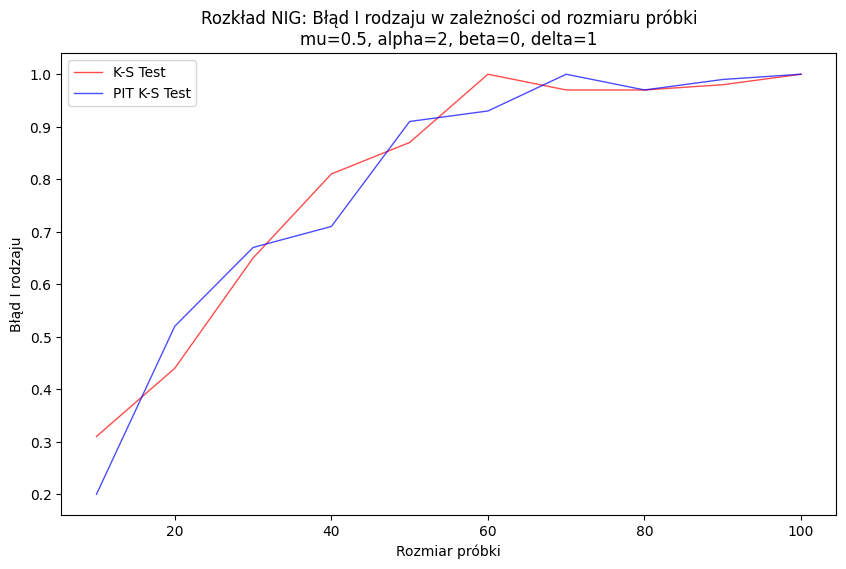

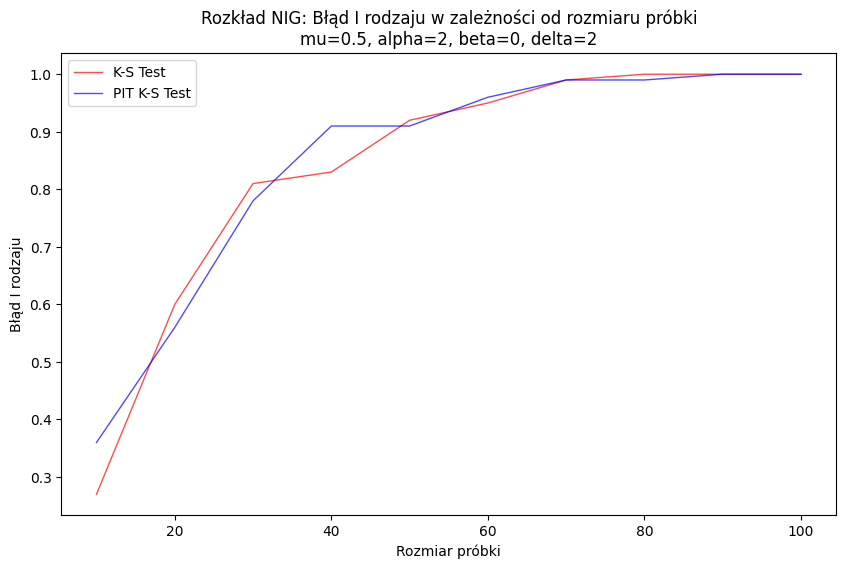

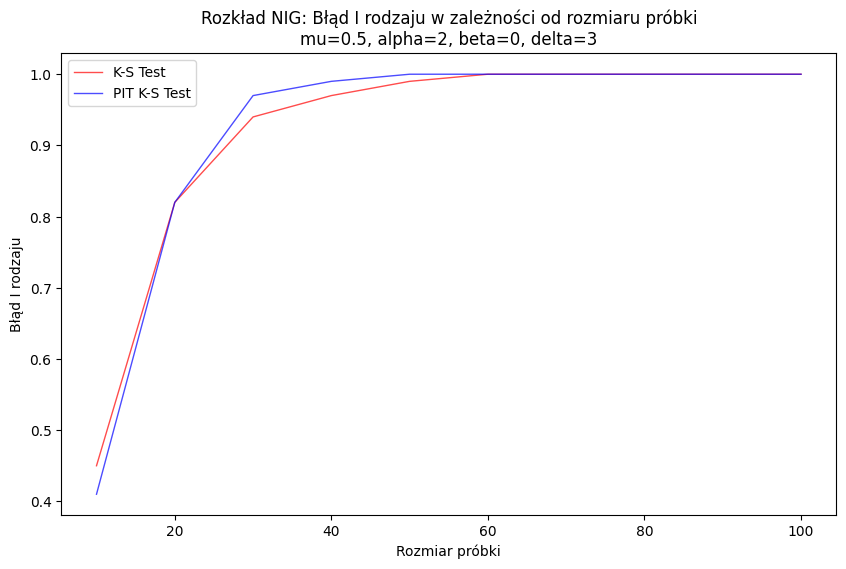

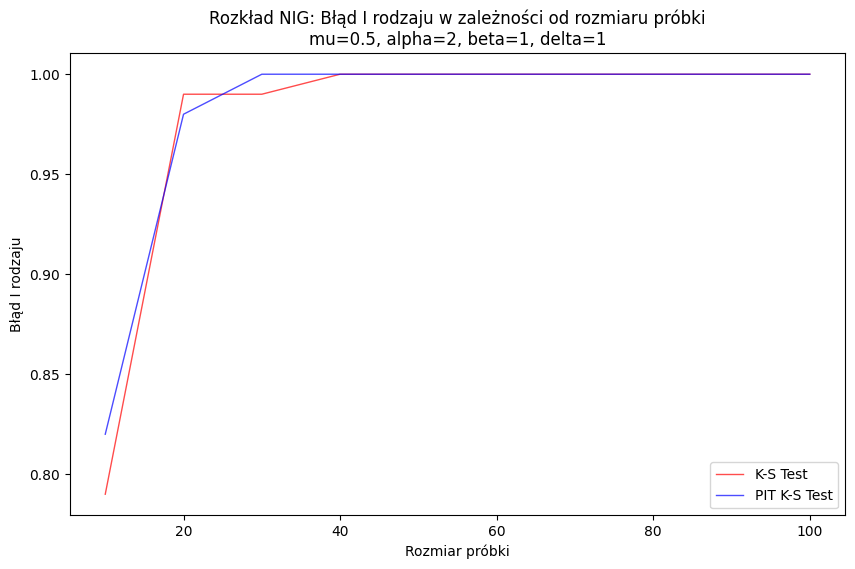

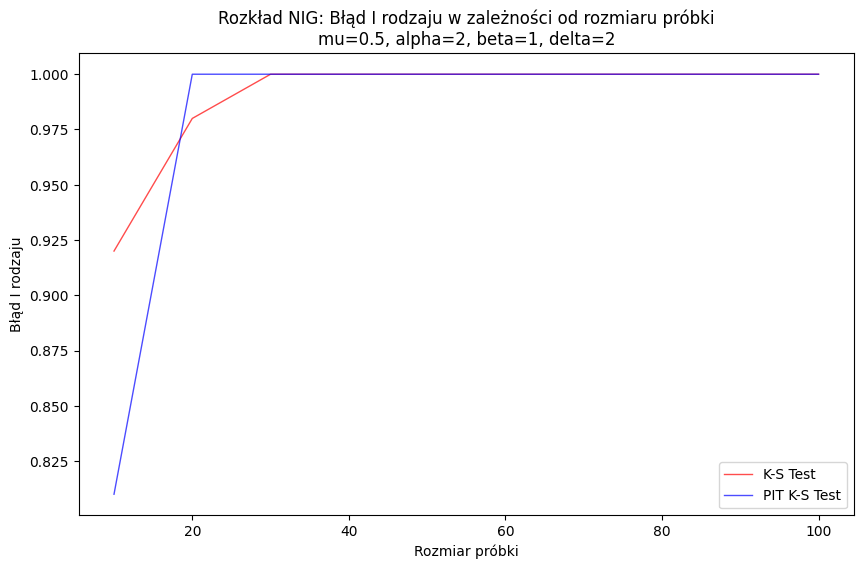

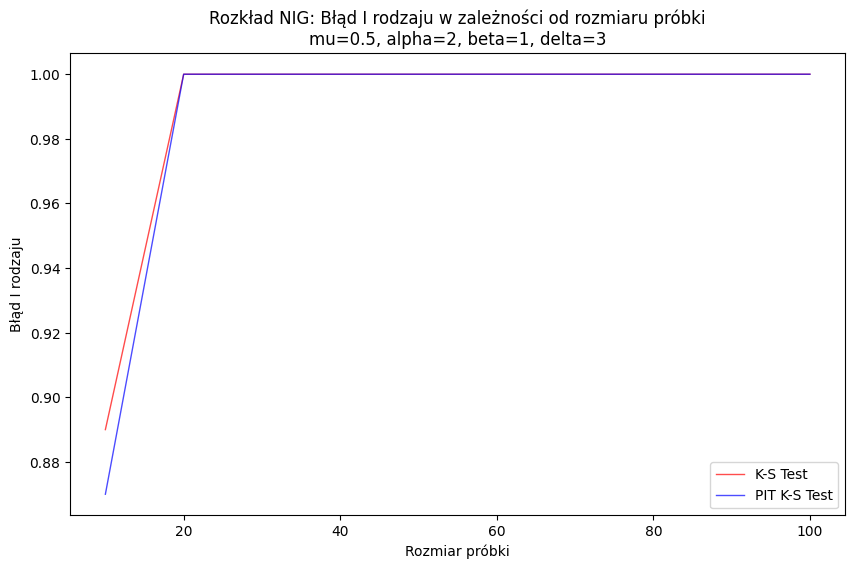

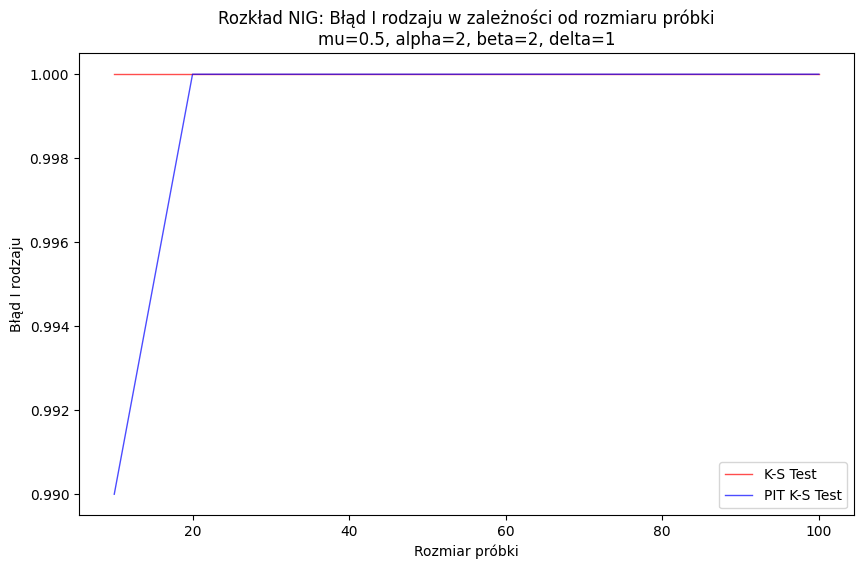

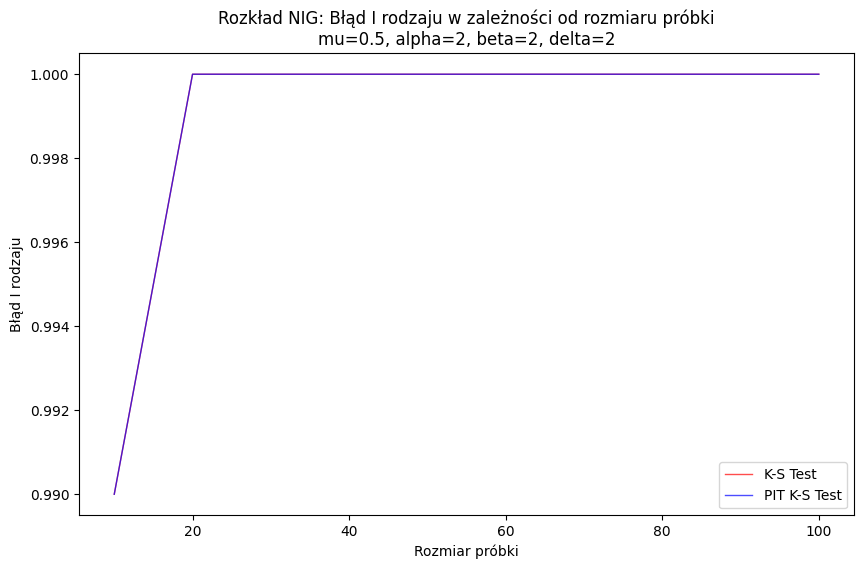

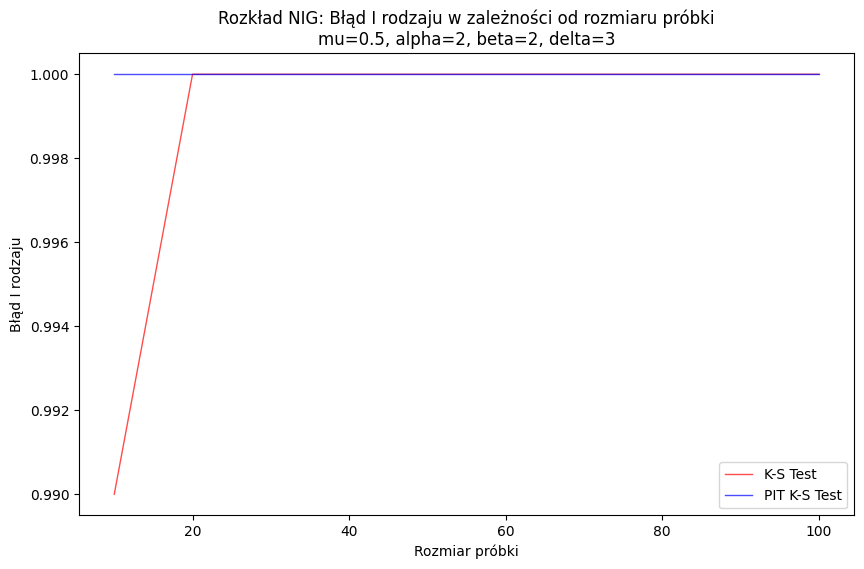

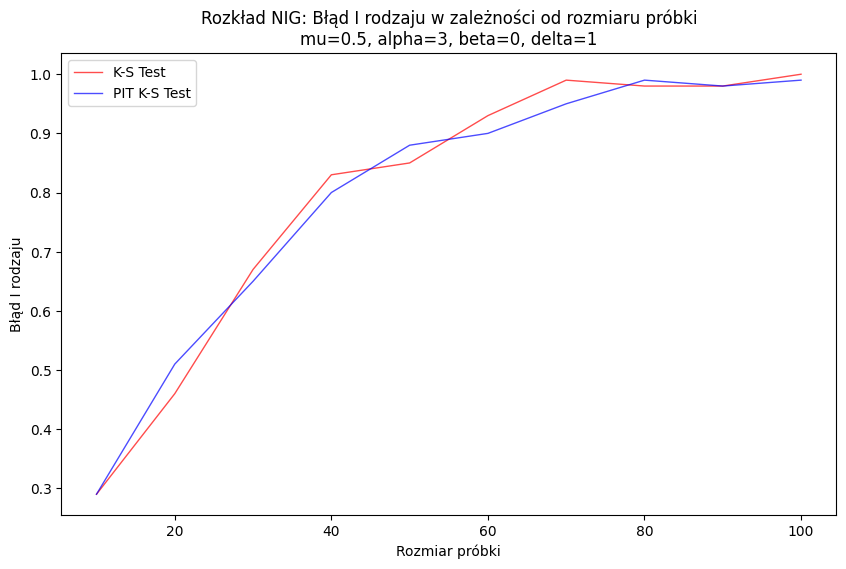

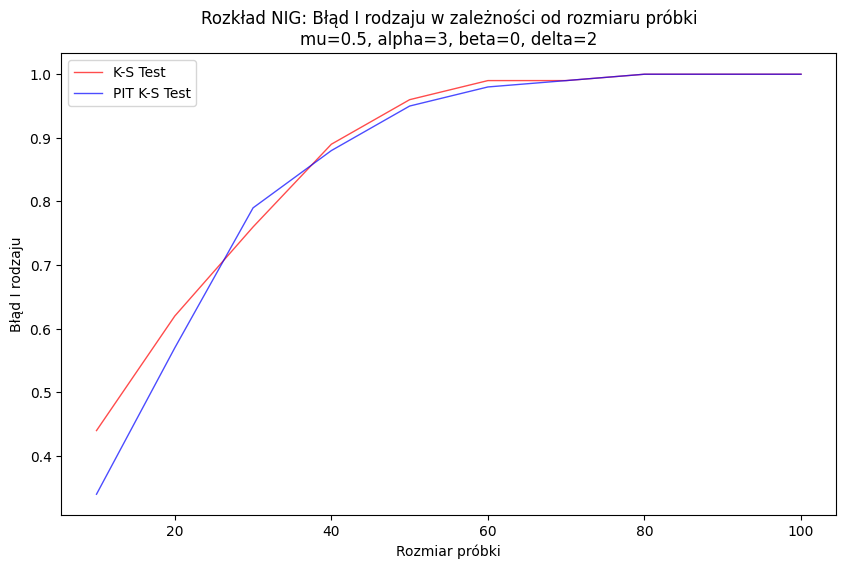

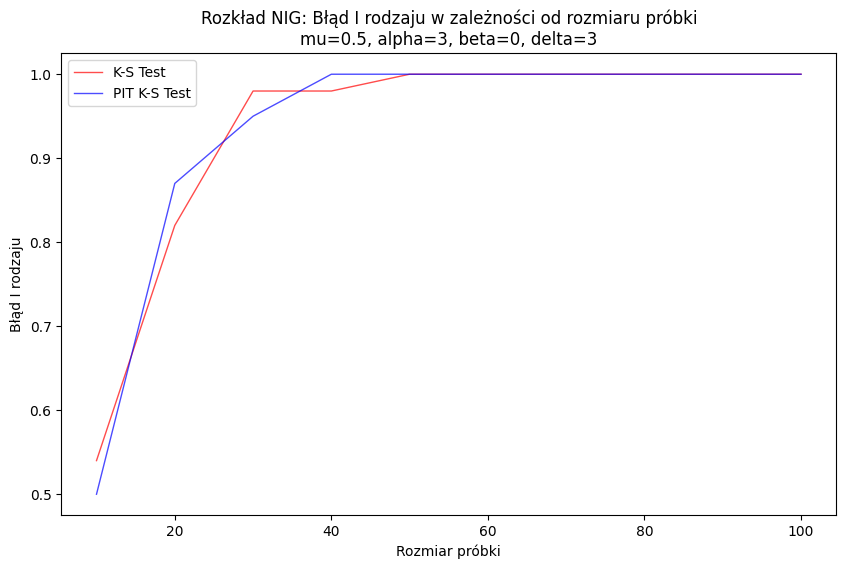

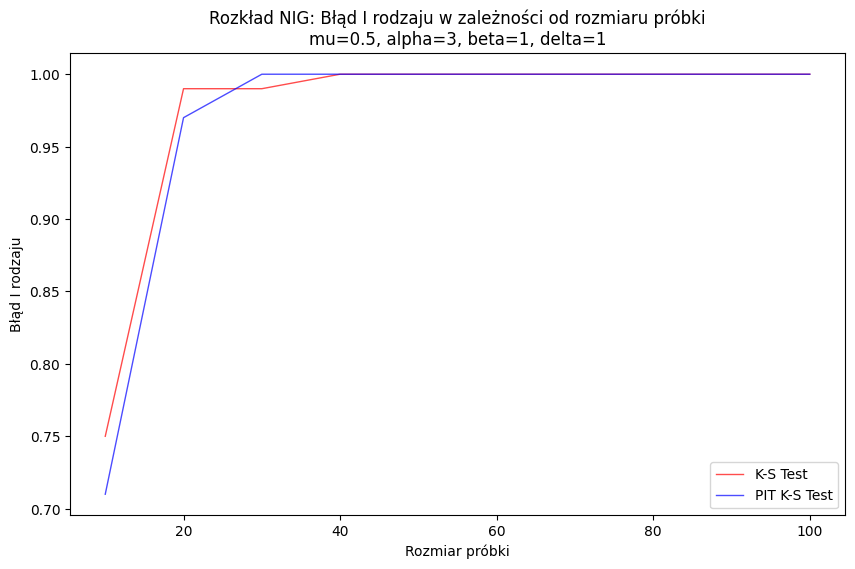

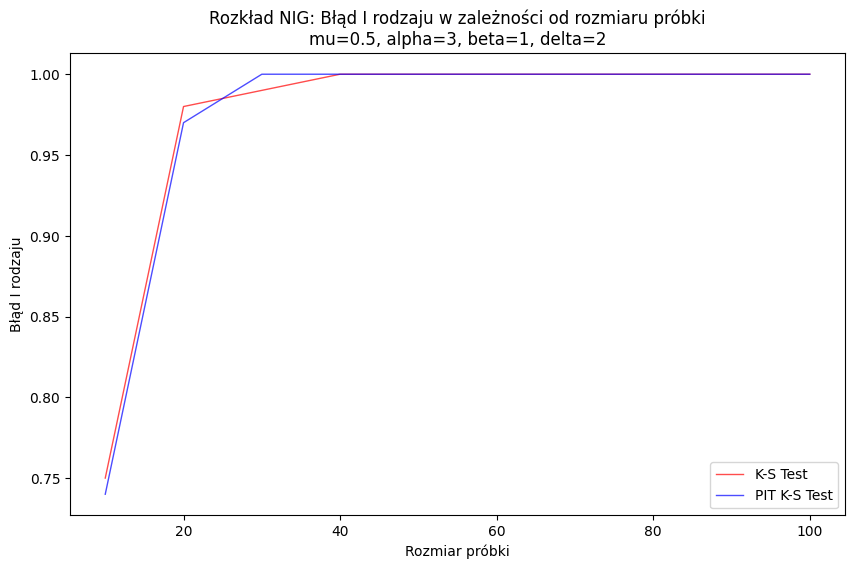

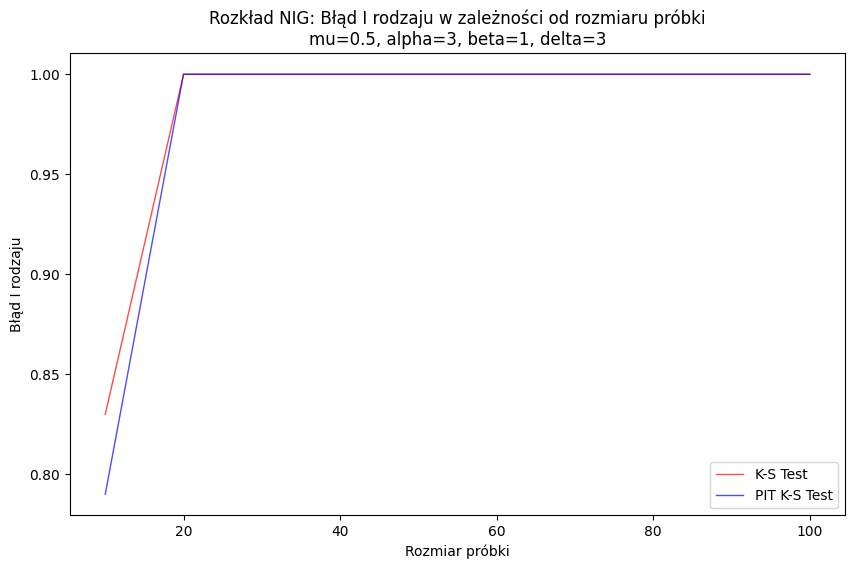

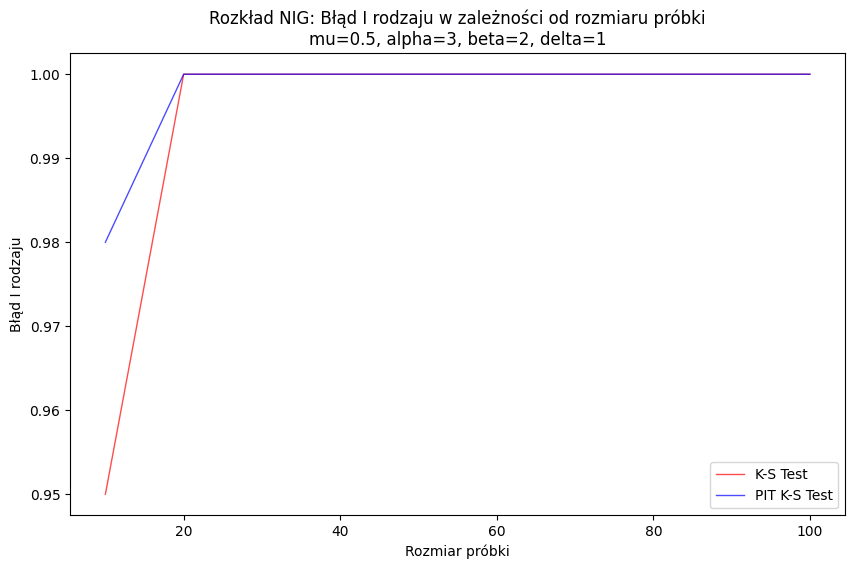

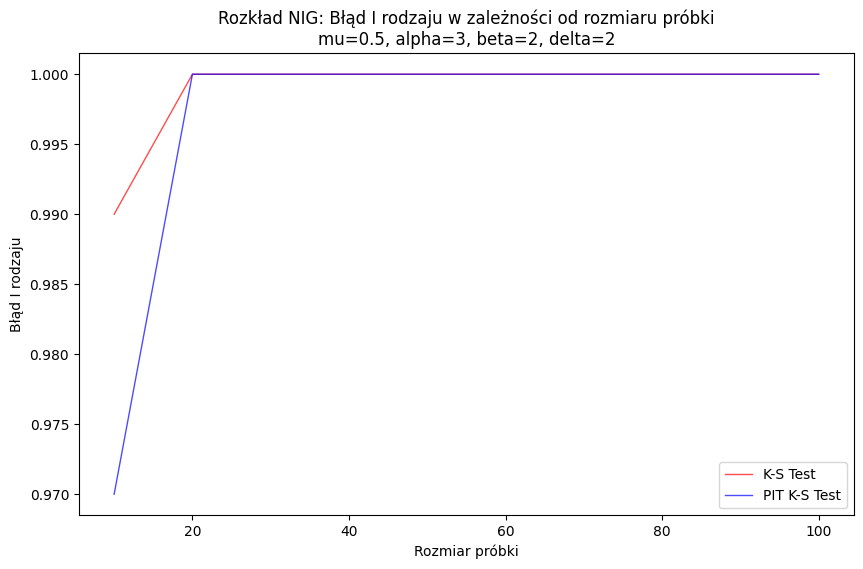

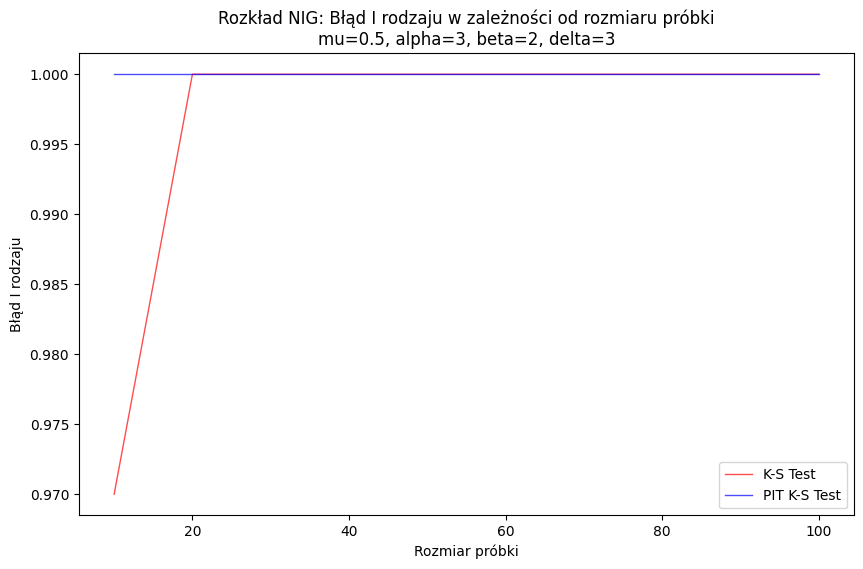

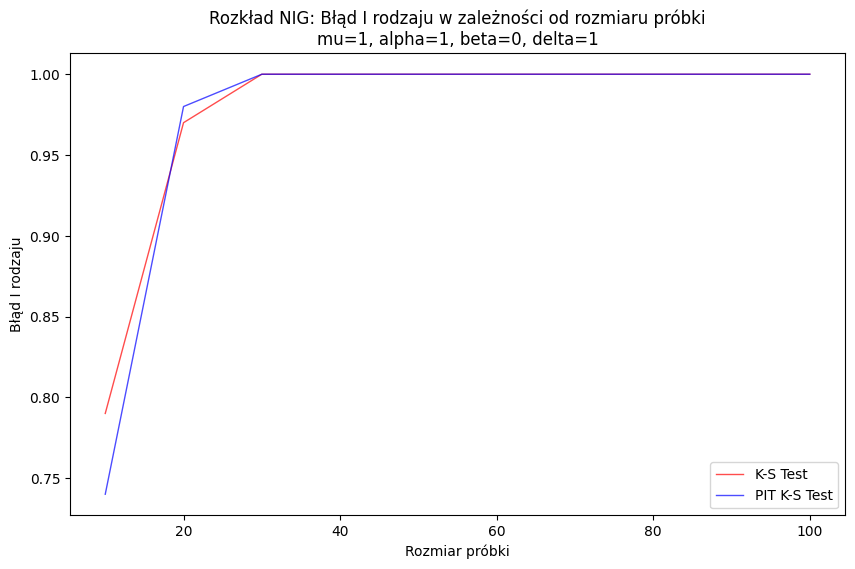

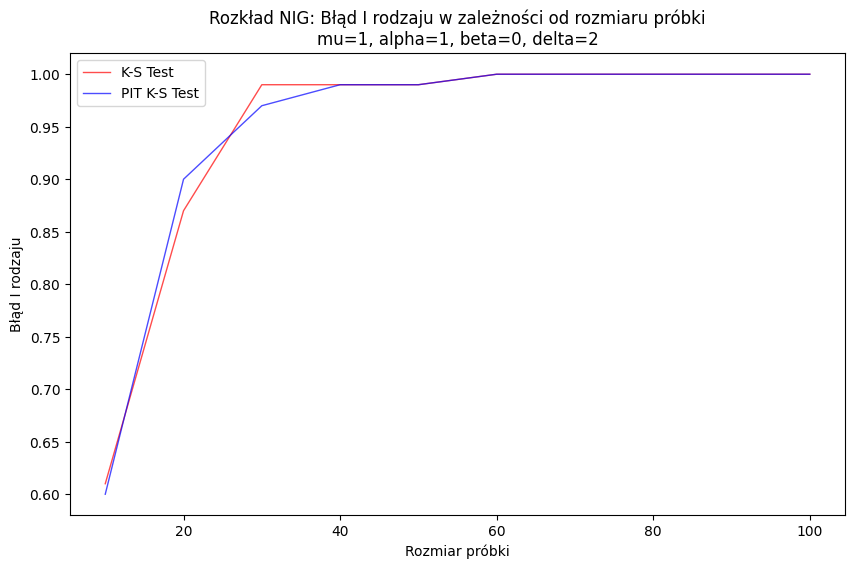

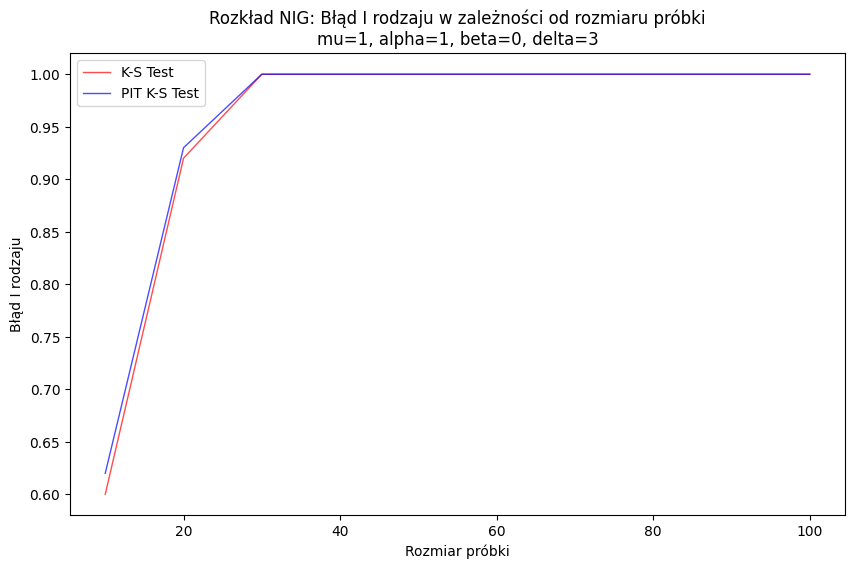

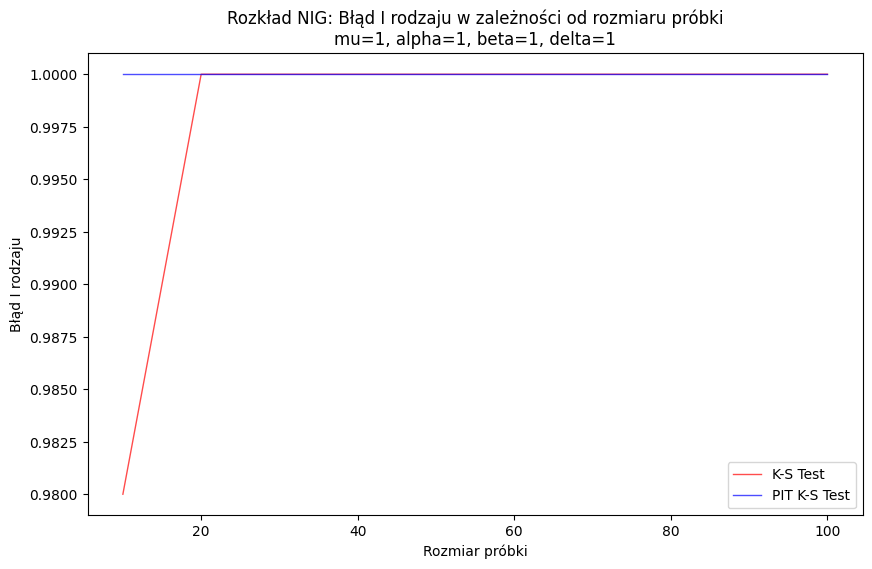

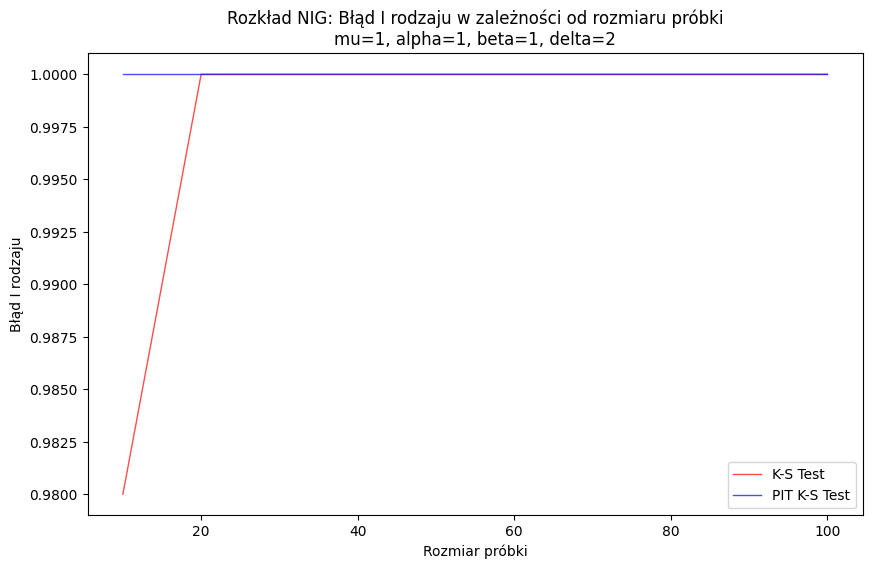

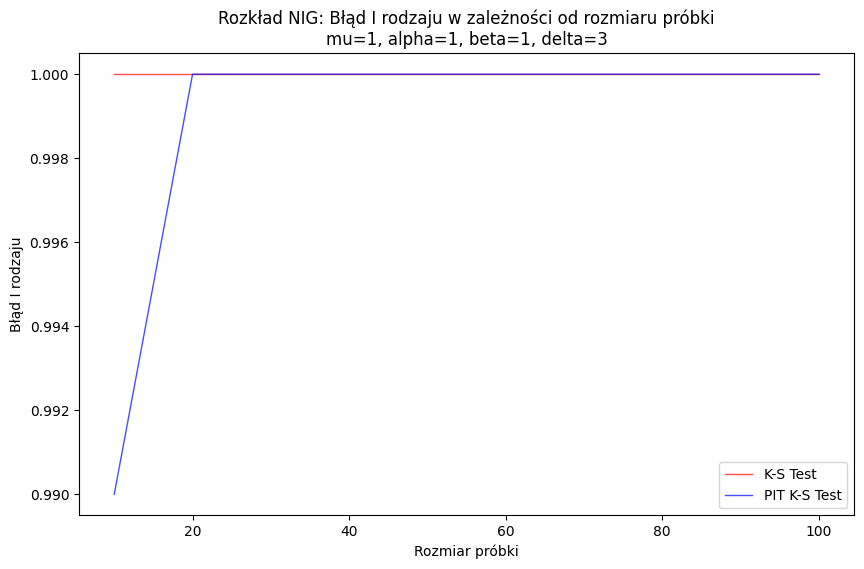

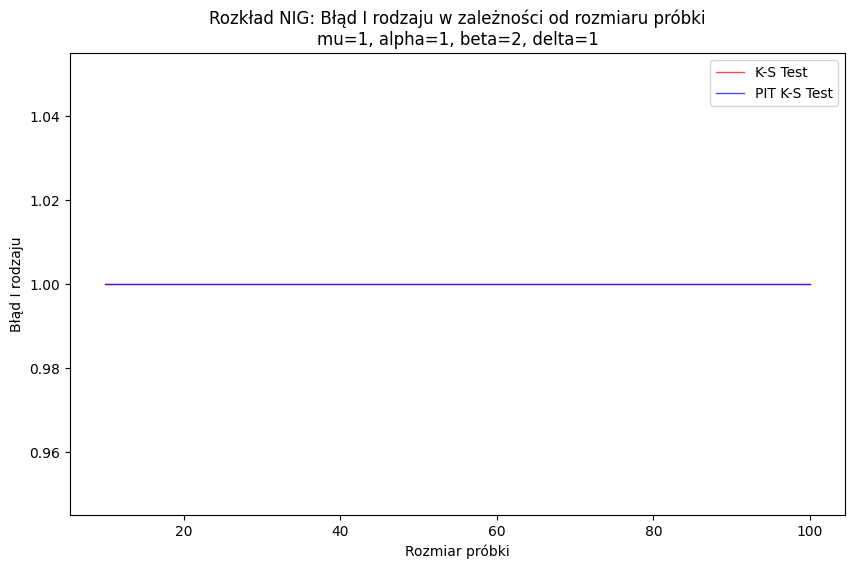

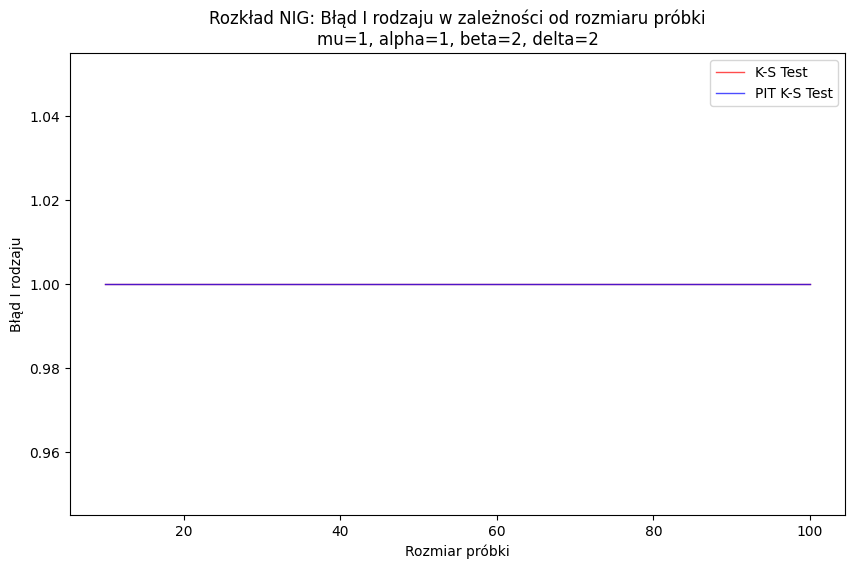

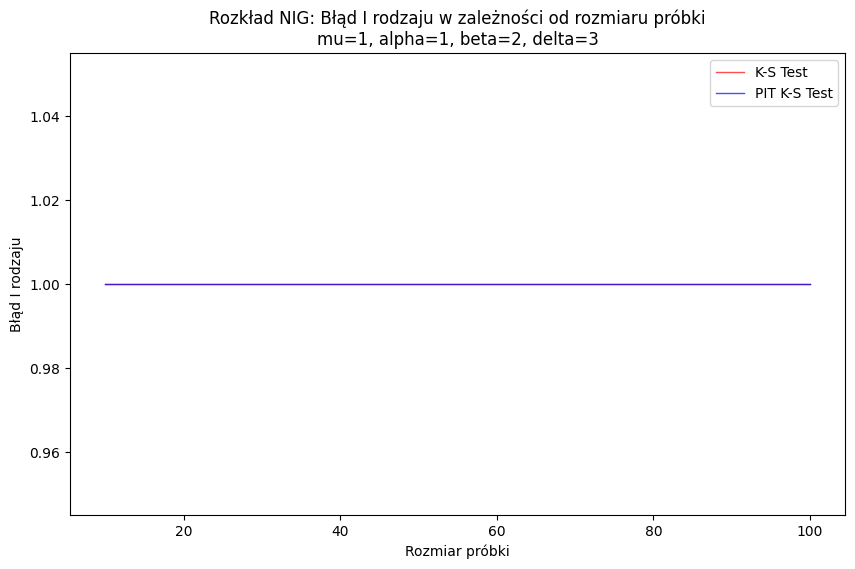

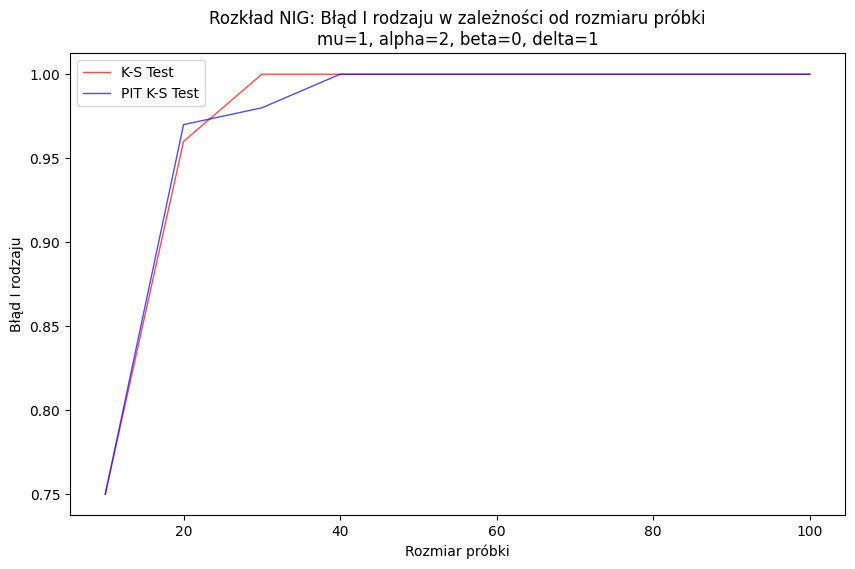

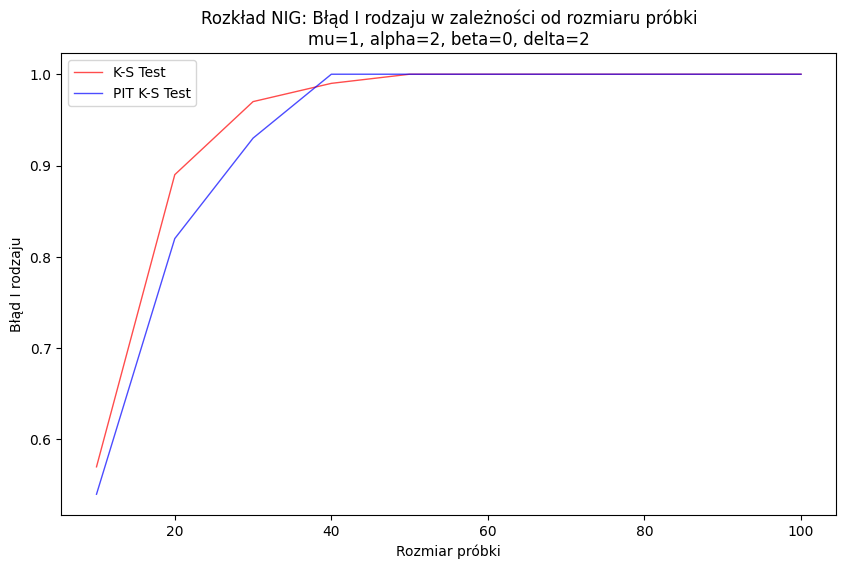

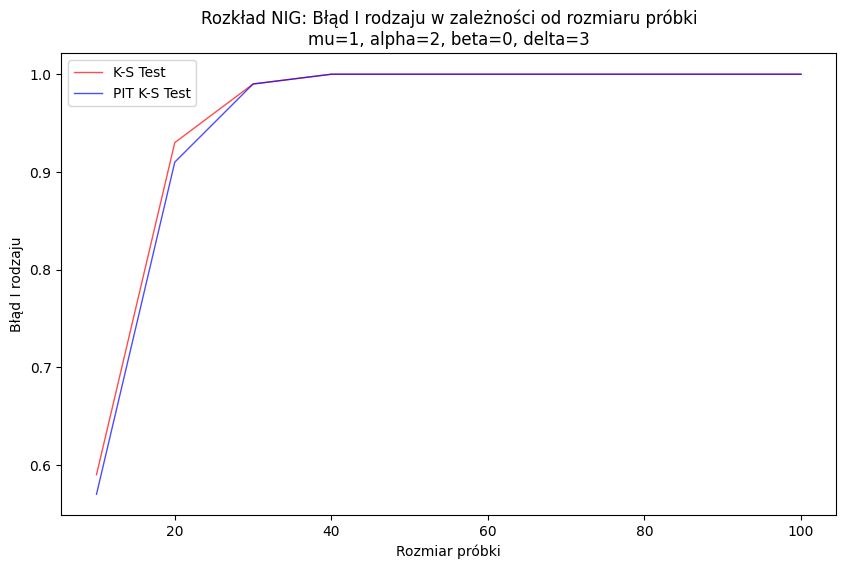

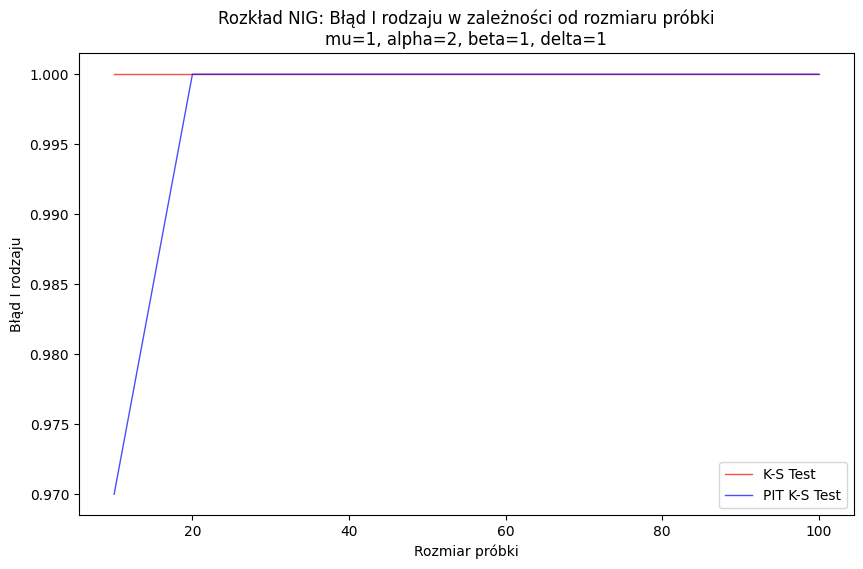

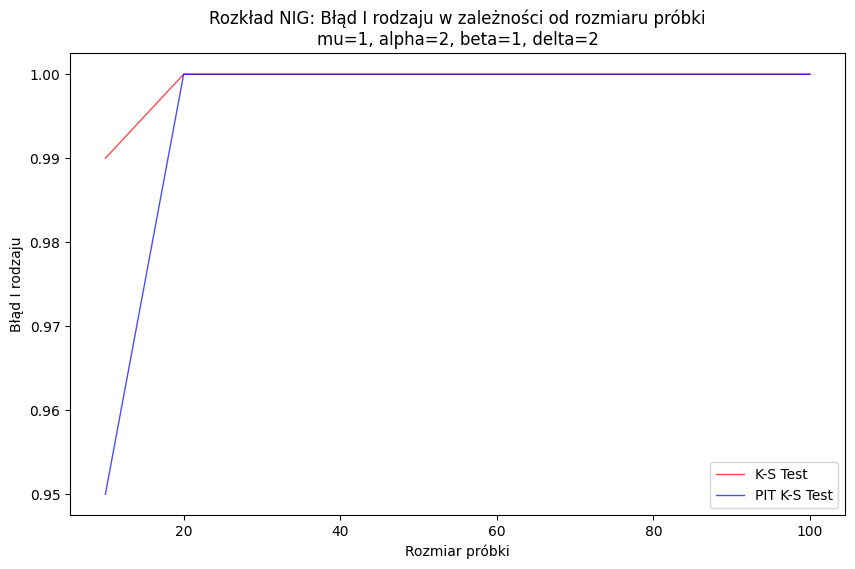

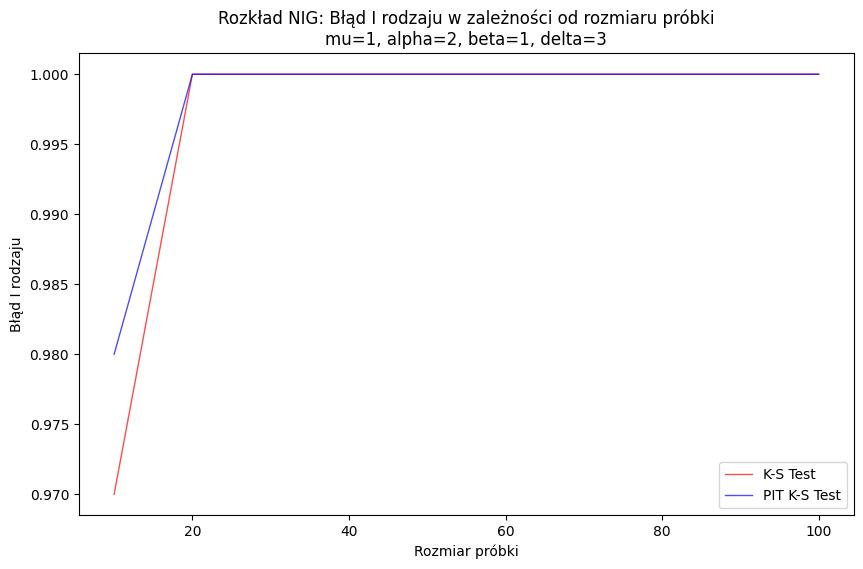

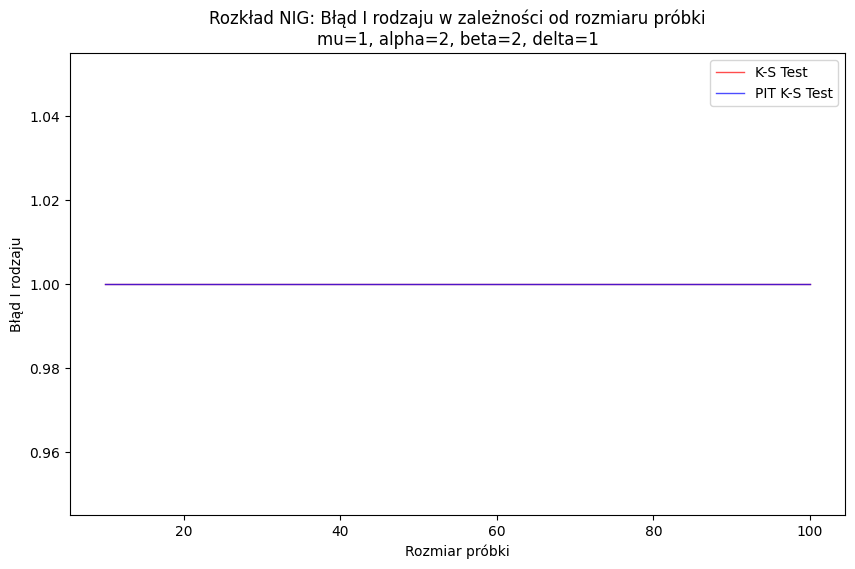

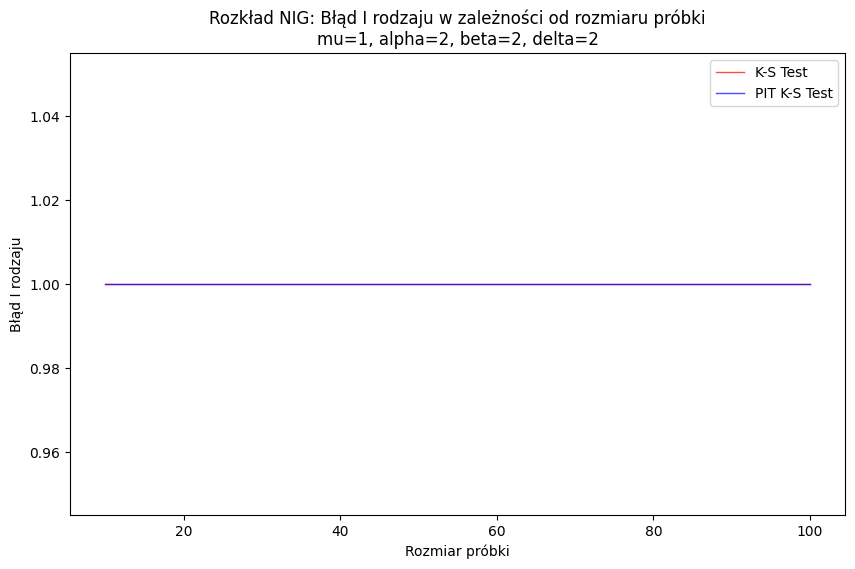

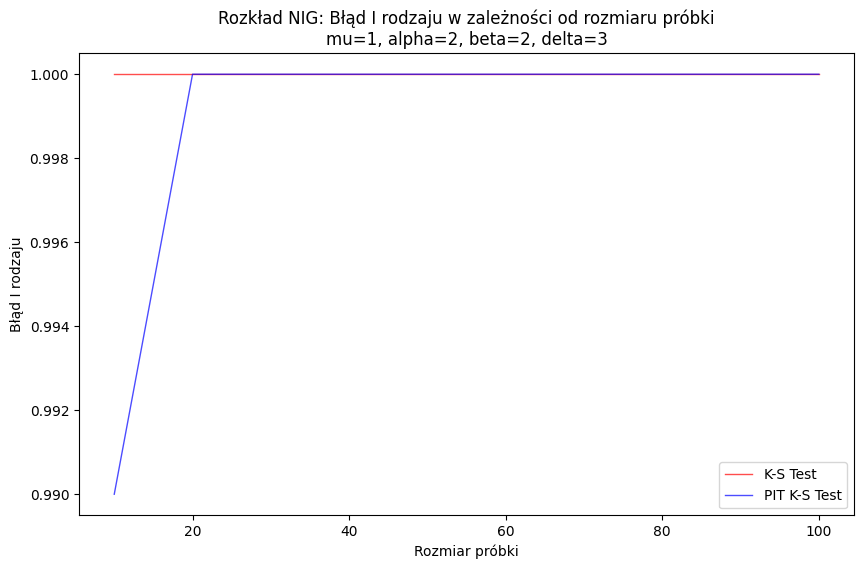

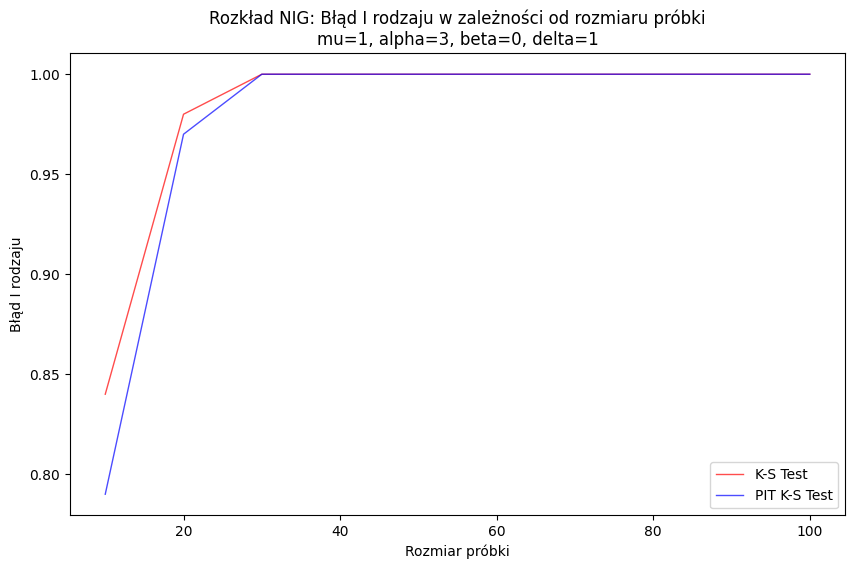

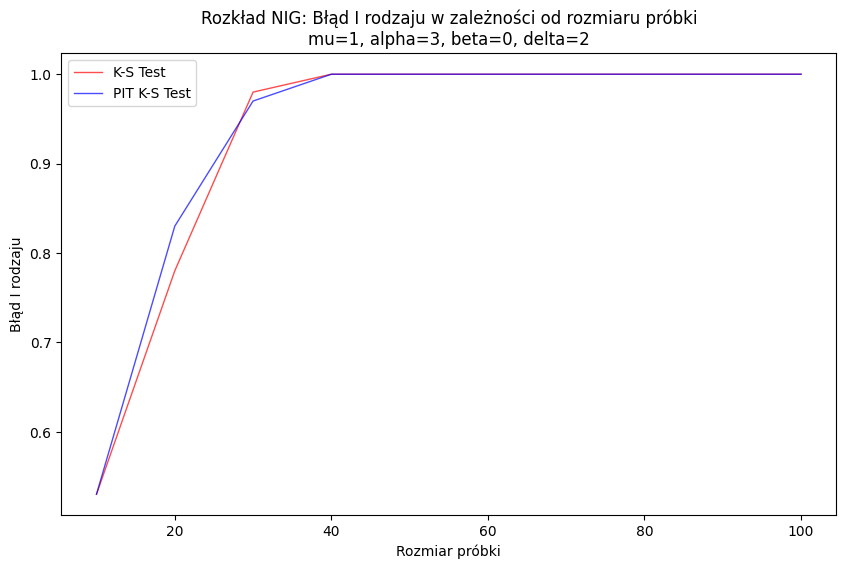

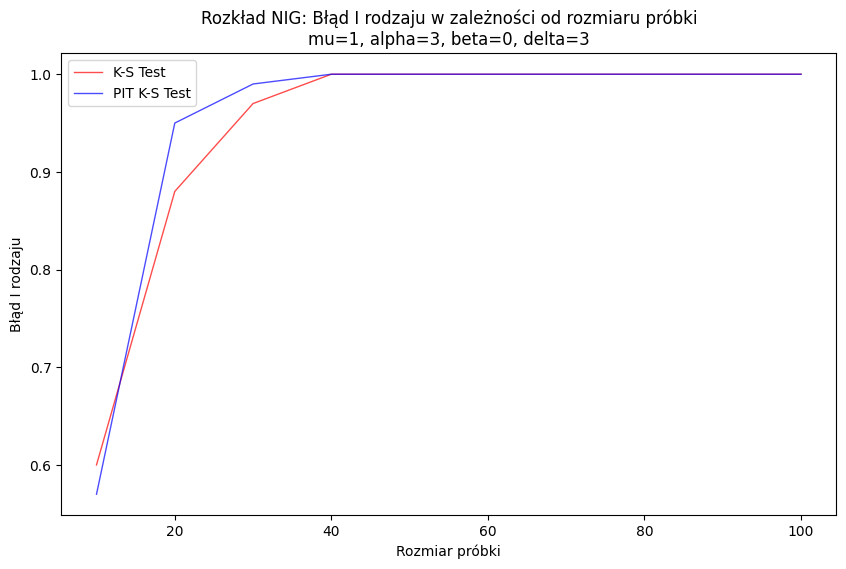

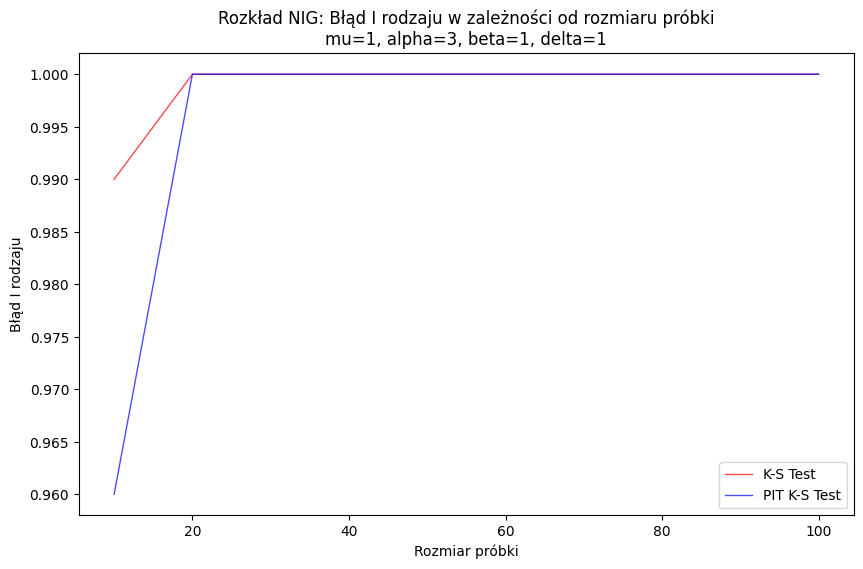

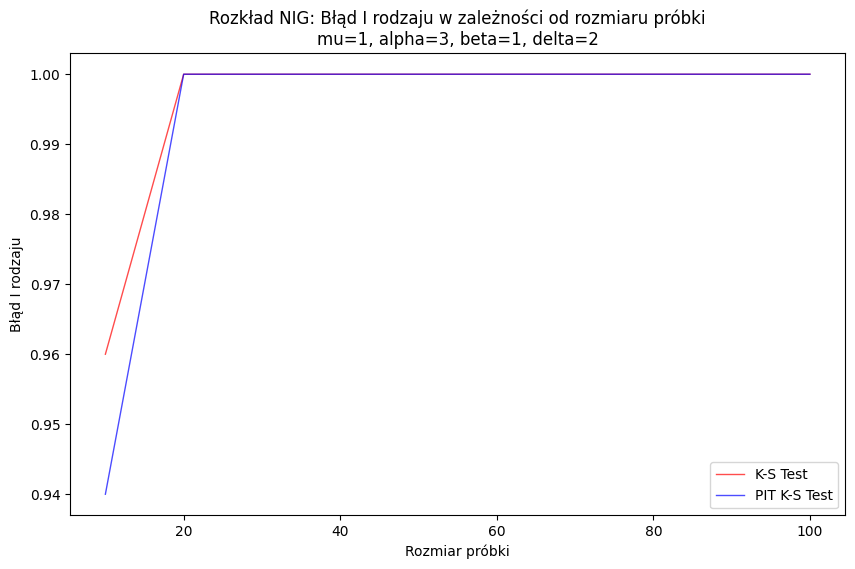

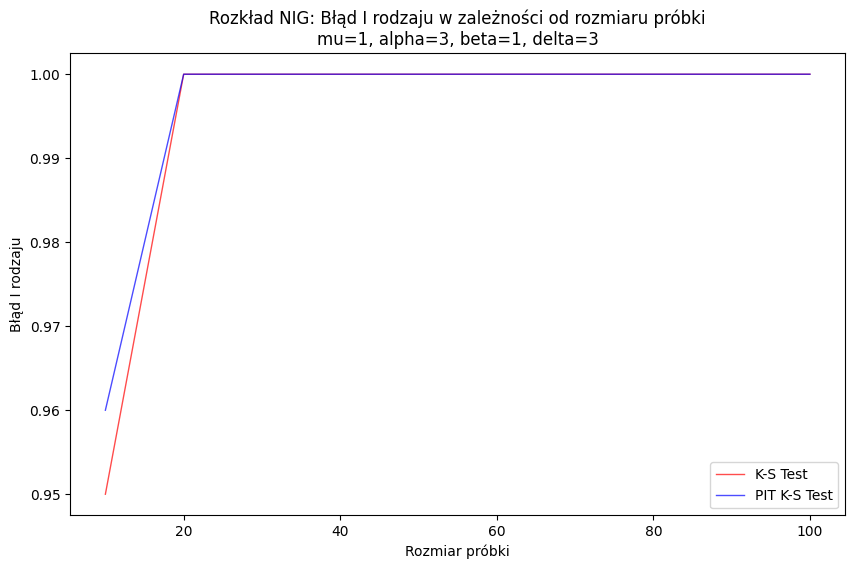

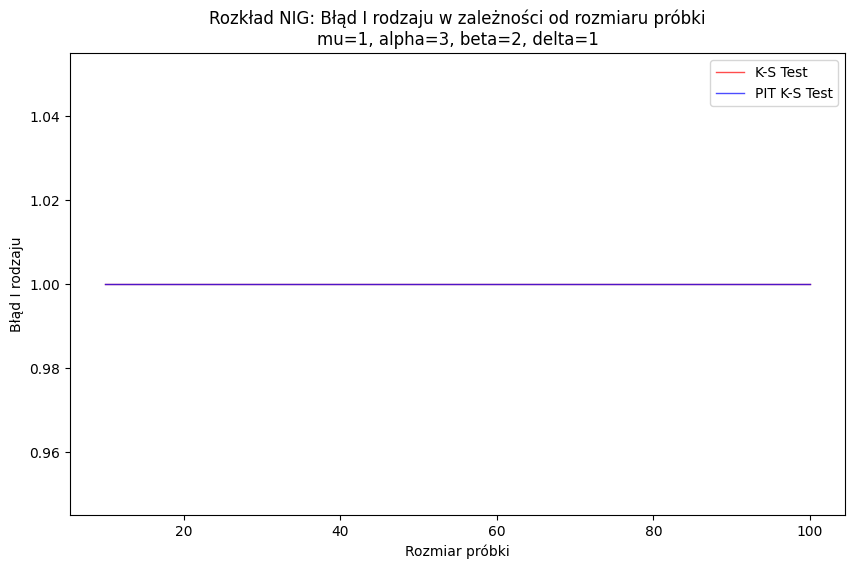

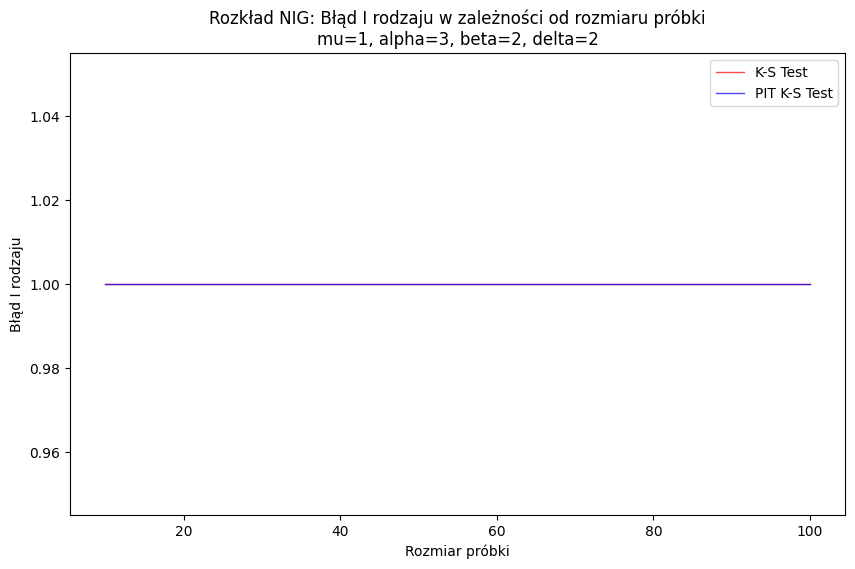

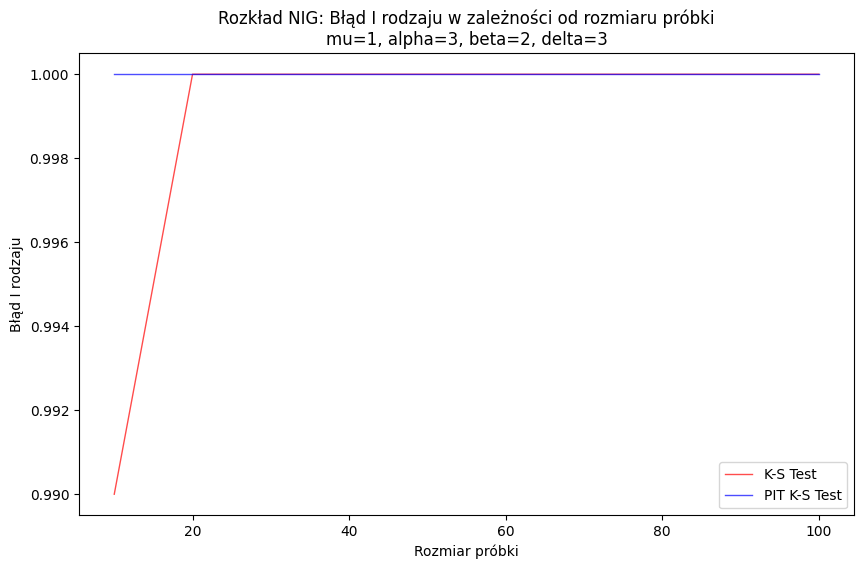

In [16]:
import matplotlib.pyplot as plt

# Przygotowanie danych
gamma_results = [result for result in results if result[0] == 'Gamma']
nig_results = [result for result in results if result[0] == 'NIG']

# Wykresy dla rozkładu Gamma
for shape in shape_params:
    for scale in scale_params:
        plt.figure(figsize=(10, 6))
        subset = [result for result in gamma_results if result[1] == shape and result[2] == scale]
        x = [result[3] for result in subset]  # rozmiary próbek
        y1 = [result[4] for result in subset]  # wyniki testu Kołmogorowa-Smirnowa
        y2 = [result[5] for result in subset]  # wyniki testu Kołmogorowa-Smirnowa z PIT
        plt.plot(x, y1, label='K-S Test', color='red', linewidth=1, alpha=0.7)
        plt.plot(x, y2, label='PIT K-S Test', color='blue', linewidth=1, alpha=0.7)
        plt.title(f'Rozkład Gamma: Błąd I rodzaju w zależności od rozmiaru próbki\nshape={shape}, scale={scale}')
        plt.xlabel('Rozmiar próbki')
        plt.ylabel('Błąd I rodzaju')
        plt.legend()
        plt.show()

# Wykresy dla rozkładu NIG
for mu in mu_params:
    for alpha in alpha_params:
        for beta in beta_params:
            for delta in delta_params:
                plt.figure(figsize=(10, 6))
                subset = [result for result in nig_results if result[1] == mu and result[2] == alpha and result[3] == beta and result[4] == delta]
                x = [result[5] for result in subset]  # rozmiary próbek
                y1 = [result[6] for result in subset]  # wyniki testu Kołmogorowa-Smirnowa
                y2 = [result[7] for result in subset]  # wyniki testu Kołmogorowa-Smirnowa z PIT
                plt.plot(x, y1, label='K-S Test', color='red', linewidth=1, alpha=0.7)
                plt.plot(x, y2, label='PIT K-S Test', color='blue', linewidth=1, alpha=0.7)
                plt.title(f'Rozkład NIG: Błąd I rodzaju w zależności od rozmiaru próbki\nmu={mu}, alpha={alpha}, beta={beta}, delta={delta}')
                plt.xlabel('Rozmiar próbki')
                plt.ylabel('Błąd I rodzaju')
                plt.legend()
                plt.show()


Wnioski i interpretacja:

Obie krzywe zaczynają się od wyższego błędu I rodzaju, gdy liczba danych jest mała, i maleją wraz ze wzrostem liczby danych. Wskazuje to, że większe próbki mogą prowadzić do niższego prawdopodobieństwa odrzucenia prawdziwej hipotezy zerowej.

Możemy zauważyć, że dla danego rozmiaru próbki, błąd I rodzaju jest generalnie podobny dla testu PIT K-S w porównaniu do klasycznego testu K-S. M

Podsumowując, wyniki te pokazują, jak błąd I rodzaju w teście Kołmogorowa zależy od liczby danych i parametrów generowanego rozkładu. Jednakże, zwiększenie liczby danych może znacznie zmniejszyć błąd I rodzaju, co jest ważnym wnioskiem do uwzględnienia podczas planowania i interpretacji testów statystycznych.

W rozkładzie Gamma sytuacja jest bardzo podobna, różnica pomiędzy PIT a zwykłą metodą testu jest minimalna tak naprawdę i zależy od czynnika losowego.

Sytuacja, w której w rozkładzie NIK parametr beta jest równy 0 błąd 1 rodzaju jest strasznie niestabilny, niezależnie od innych parametrów.